# Analyse der Tweets von Bundestagsabgeordneten
## 1. Dataset preparation

In [1]:
import pymongo

client = pymongo.MongoClient("mongodb://localhost:27017/")

db = client['Twitter']
All_Tweets_collection = db['twitter_mdp_ex_date_proj']


In [2]:
import pandas as pd
import pymongo
import datetime

pd.set_option('display.max_colwidth', 0)

# sample_df = pd.DataFrame(list(All_Tweets_collection.aggregate([ {"$sample": {"size": 50 }}], 
#                                      allowDiskUse=True
#                                    )))

time_sample_df = pd.DataFrame(list(All_Tweets_collection.find( {
            'created_at_datetime': {'$gte': datetime.datetime(2020,1,1,0,0,0),
                                    '$lt': datetime.datetime(2020,5,31,0,0,0)},
            'retweeted_id': None
            })
        ))

##### Text Cleaning

In [3]:
# Load the regular expression library
pd.set_option('display.max_colwidth', 0)
import re

def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F900-\U0001F9FF"  # https://www.compart.com/de/unicode/block/U+1F900
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

sample_df = time_sample_df
# Remove punctuation
sample_df.loc[:,('full_text_processed')] = sample_df.loc[:,('full_text')].map(lambda x: re.sub('[,\.!?#@\\n"“„\:;&\(\)]', '', x))
# Remove Links
sample_df.loc[:,('full_text_processed')] = sample_df.loc[:,('full_text_processed')].map(lambda x: re.sub('http.*', '', x))

sample_df.loc[:,('full_text_processed')] = sample_df.loc[:,('full_text_processed')].map(lambda x: re.sub('amp', '', x))
# Convert the titles to lowercase
#sample_df['full_text_processed'] = sample_df['full_text_processed'].map(lambda x: x.lower())

#sample_df['full_text_processed'] = sample_df['full_text_processed'].map(lambda x: remove_emoji(x))
# Print out the first rows of papers
sample_df['full_text_processed'].head(200)

0      Kein Mensch braucht umfaller/ fdp weder in der Politik noch in den Medien 🙄                                                                                                                                                                                       
1      Ganz einfachWeil es zumal auf Dauer niemals ein datenschutzgerechtes Tool geben und das ein weiterer großer Schritt Richtung Überwachungsstaat sein wirdIch wünsche mir dringend etwas mehr Problembewusstsein und kritische Distanz beim Datenschutzbeauftragten 
2      Von wegen Einthemenpartei AfD Hier eine kleine  Auswahl allein von demwas ich  so angestoßen habeHinzukommen noch 88 weitere MdB-Kollegen  zwei Dutzend ArbeitskreiseDie Karten gibt’s bei den FraktionsveranstaltungenzB BiGAfDwirkt Berlin Bundestag Brandner   
3      20 Männer attackieren Frankfurter Corona-Polizeistreife                                                                                                                                            

##### Durchsuche Datensatz nach bestimmten Tweets und sortiere aus

In [ ]:
# Print words that match certain words:
#sample_df['full_text_processed'][sample_df['full_text_processed'].str.match(r'.*brexit.*')==True]

# Remove Tweets that match certain words:
# sample_df = sample_df[~sample_df.full_text_processed.str.contains("fröhlicher gruss")]
# sample_df.groupby('user_party').size()

##### Stopwords

In [ ]:
#from stop_words import get_stop_words
#stop_words = get_stop_words('de')

import stopwordsiso as stopwords
stop_words = list(stopwords.stopwords(["de"])) 

mehr_sw = ['der', 'die', 'das', 'Das', 'the', 'ist' 'es', 'gibt', 'und', 'für', 'auf', 'aus', 'mit', 'dem', 'tb', 'cducsubt', 'spdbt', 'fdpbt', 'sdpde']
for word in mehr_sw:
    stop_words.append(word)
    


# Wordclouds
#### Basic

In [ ]:
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(sample_df['full_text_processed'])
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop_words, min_word_length=3)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

#### Wordcloud zu bestimmtem Zeitunkt

In [ ]:
from wordcloud import WordCloud

sample_df_date = sample_df.loc[(sample_df['created_at_datetime'] <= datetime.datetime(2019,6,8,0,0,0)) & (sample_df['created_at_datetime'] >= datetime.datetime(2019,5,15,0,0,0))]

# Join the different processed titles together.
long_string = ','.join(sample_df_date['full_text_processed'])
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop_words, min_word_length=3)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
plt.imshow(wordcloud)

### Wöchentliche Wordcloud - Union

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from wordcloud import WordCloud

party = 'Union'
sample_df_partei = sample_df[sample_df.user_party == party]

sample_df_month = list(set(sample_df_partei['month']))
sample_df_month.sort()

date_dic_partei = {}
   
for month in sample_df_month:
    date_dic_partei[month] = sample_df_partei[sample_df_partei['month'] == month]

    
def FktWordCloud(long_string):
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop_words, min_word_length=4)
    wordcloud.generate(long_string)
    wordcloud.to_image()
    return wordcloud

fig = plt.figure(figsize = (18, 50))

for month, n in zip(date_dic_partei, range(1,len(date_dic_partei.keys())+1)):
    title = month

    ax = fig.add_subplot(14,3,n)
    ax.set_title(title,fontweight="bold", color='navy', size=20)
    fig.tight_layout()
    long_string = ','.join(date_dic_partei[month]['full_text_processed'])
    wordcloud = FktWordCloud(long_string)
    ax.imshow(wordcloud)
    ax.axis('off')

fig.suptitle(party + '_Tweets', fontsize=25, color='navy', y=1.01)

### Wöchentliche Wordcloud - AFD

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from wordcloud import WordCloud

party = 'AFD'

sample_df_partei = sample_df[sample_df.user_party == party]

sample_df_month = list(set(sample_df_partei['month']))
sample_df_month.sort()

date_dic_partei = {}
   
for month in sample_df_month:
    date_dic_partei[month] = sample_df_partei[sample_df_partei['month'] == month]

    
def FktWordCloud(long_string):
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop_words, min_word_length=4)
    wordcloud.generate(long_string)
    wordcloud.to_image()
    return wordcloud

fig = plt.figure(figsize = (18, 50))

for month, n in zip(date_dic_partei, range(1,len(date_dic_partei.keys())+1)):
    title = month

    ax = fig.add_subplot(14,3,n)
    ax.set_title(title,fontweight="bold", color='navy', size=20)
    fig.tight_layout()
    long_string = ','.join(date_dic_partei[month]['full_text_processed'])
    wordcloud = FktWordCloud(long_string)
    ax.imshow(wordcloud)
    ax.axis('off')

fig.suptitle(party + '_Tweets', fontsize=25, color='navy', y=1.01)

### Wöchentliche Wordcloud - SPD

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from wordcloud import WordCloud

party = 'SPD'

sample_df_partei = sample_df[sample_df.user_party == party]

sample_df_month = list(set(sample_df_partei['month']))
sample_df_month.sort()

date_dic_partei = {}
   
for month in sample_df_month:
    date_dic_partei[month] = sample_df_partei[sample_df_partei['month'] == month]

    
def FktWordCloud(long_string):
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop_words, min_word_length=4)
    wordcloud.generate(long_string)
    wordcloud.to_image()
    return wordcloud

fig = plt.figure(figsize = (18, 50))

for month, n in zip(date_dic_partei, range(1,len(date_dic_partei.keys())+1)):
    title = month

    ax = fig.add_subplot(14,3,n)
    ax.set_title(title,fontweight="bold", color='navy', size=20)
    fig.tight_layout()
    long_string = ','.join(date_dic_partei[month]['full_text_processed'])
    wordcloud = FktWordCloud(long_string)
    ax.imshow(wordcloud)
    ax.axis('off')

fig.suptitle(party + '_Tweets', fontsize=25, color='navy', y=1.01)

### Wöchentliche Wordcloud - Grüne

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from wordcloud import WordCloud

party = 'Gruene'

sample_df_partei = sample_df[sample_df.user_party == party]

sample_df_month = list(set(sample_df_partei['month']))
sample_df_month.sort()

date_dic_partei = {}
   
for month in sample_df_month:
    date_dic_partei[month] = sample_df_partei[sample_df_partei['month'] == month]

    
def FktWordCloud(long_string):
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop_words, min_word_length=4)
    wordcloud.generate(long_string)
    wordcloud.to_image()
    return wordcloud

fig = plt.figure(figsize = (18, 50))

for month, n in zip(date_dic_partei, range(1,len(date_dic_partei.keys())+1)):
    title = month

    ax = fig.add_subplot(14,3,n)
    ax.set_title(title,fontweight="bold", color='navy', size=20)
    fig.tight_layout()
    long_string = ','.join(date_dic_partei[month]['full_text_processed'])
    wordcloud = FktWordCloud(long_string)
    ax.imshow(wordcloud)
    ax.axis('off')

fig.suptitle(party + '_Tweets', fontsize=25, color='navy', y=1.01)

### Wöchentliche Wordcloud - Linke

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from wordcloud import WordCloud

party = 'Linke'

sample_df_partei = sample_df[sample_df.user_party == party]

sample_df_month = list(set(sample_df_partei['month']))
sample_df_month.sort()

date_dic_partei = {}
   
for month in sample_df_month:
    date_dic_partei[month] = sample_df_partei[sample_df_partei['month'] == month]

    
def FktWordCloud(long_string):
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop_words, min_word_length=4)
    wordcloud.generate(long_string)
    wordcloud.to_image()
    return wordcloud

fig = plt.figure(figsize = (18, 50))

for month, n in zip(date_dic_partei, range(1,len(date_dic_partei.keys())+1)):
    title = month

    ax = fig.add_subplot(14,3,n)
    ax.set_title(title,fontweight="bold", color='navy', size=20)
    fig.tight_layout()
    long_string = ','.join(date_dic_partei[month]['full_text_processed'])
    wordcloud = FktWordCloud(long_string)
    ax.imshow(wordcloud)
    ax.axis('off')

fig.suptitle(party + '_Tweets', fontsize=25, color='navy', y=1.01)

### Wöchentliche Wordcloud - FDP

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from wordcloud import WordCloud

party = 'FDP'

sample_df_partei = sample_df[sample_df.user_party == party]

sample_df_month = list(set(sample_df_partei['month']))
sample_df_month.sort()

date_dic_partei = {}
   
for month in sample_df_month:
    date_dic_partei[month] = sample_df_partei[sample_df_partei['month'] == month]

    
def FktWordCloud(long_string):
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop_words, min_word_length=4)
    wordcloud.generate(long_string)
    wordcloud.to_image()
    return wordcloud

fig = plt.figure(figsize = (18, 50))

for month, n in zip(date_dic_partei, range(1,len(date_dic_partei.keys())+1)):
    title = month

    ax = fig.add_subplot(14,3,n)
    ax.set_title(title,fontweight="bold", color='navy', size=20)
    fig.tight_layout()
    long_string = ','.join(date_dic_partei[month]['full_text_processed'])
    wordcloud = FktWordCloud(long_string)
    ax.imshow(wordcloud)
    ax.axis('off')

fig.suptitle(party + '_Tweets', fontsize=25, color='navy', y=1.01)

#### Wordcloud Gegenüberstellung von Parteien

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from wordcloud import WordCloud


sample_df_date = sample_df.loc[(sample_df['date'] == datetime.date(2020,5,8))]

partei_dic_date = {}
for partei in parteien:
    partei_dic_date['tweets_'+ partei] = sample_df_date[sample_df['user_party'] == partei]  


def FktWordCloud(long_string):
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop_words, min_word_length=3)
    wordcloud.generate(long_string)
    wordcloud.to_image()
    return wordcloud

fig = plt.figure(figsize = (16, 16))
#fig.subplots_adjust(top=0.8)

for partei, n in zip(partei_dic_date, range(1,7)):
    title = str(partei)
    
    ax = fig.add_subplot(5,3,n)
    ax.set_title(title,fontweight="bold", color='navy', size=20)
    fig.tight_layout()
    sample_df_partei=partei_dic_date[partei]
    long_string = ','.join(sample_df_partei['full_text_processed'])
    wordcloud = FktWordCloud(long_string)
    ax.imshow(wordcloud)
    ax.axis('off')
fig.suptitle('Tweets 8. Mai ohne Corona', fontsize=25, color='navy', y=1.05)

In [ ]:
sample_df[sample_df['date'] == datetime.date(2020,5,8)]

## Worthäufigkeiten

In [ ]:
partei_dic = {}
parteien = ['Union', 'SPD', 'Gruene', 'Linke', 'FDP', 'AFD']

for partei in parteien:
    partei_dic['tweets_'+ partei] = sample_df[sample_df['user_party'] == partei]  

In [ ]:
sample_df_samp = sample_df.loc[(sample_df['created_at_datetime'] < datetime.datetime(2020,6,1,0,0,0)) & (sample_df['created_at_datetime'] >= datetime.datetime(2020,1,1,0,0,0))]

sample_df_month_samp = list(set(sample_df_samp['month']))
sample_df_month_samp.sort()

month_dic = {}
   
for month in sample_df_month_samp:
    month_dic[month] = sample_df_samp[sample_df_samp['month'] == month]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

   
# Initialise the count vectorizer with the german stop words
count_vectorizer = CountVectorizer(stop_words=stop_words)


#fig = plt.figure(figsize = (16, 22))
for month, n in zip(sample_df_month_samp, range(1,len(sample_df_month_samp)+1)):
    #print(month)
    title = month
    
    # Fit and transform the processed titles
    count_data = count_vectorizer.fit_transform(month_dic[month]['full_text_processed'])
    
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))

# for t in count_data:
#     total_counts+=t.toarray()[0] # total_counts = total_counts + t.toarray
    
# count_dict = (zip(words, total_counts))
# count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0]
#     #count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    
# words = [w[0] for w in count_dict]
# counts = [w[1] for w in count_dict]
# x_pos = np.arange(len(words))
    
# with plt.xkcd():
#     ax = fig.add_subplot(5,3,n, title =  title)
#     fig.tight_layout()
#     ax = sns.barplot(x_pos, counts, palette="GnBu_d")
#     ax.set_xticklabels(words, rotation = 45, fontsize=13)
    
# # fig.suptitle('Häufigkeit von Begriffen über alle Parteien hinweg', fontsize=25, color='darkslategray', y=1.05)
# plt.show()


# Barplot

#### Barplot Gegenüberstellung

In [ ]:
#from stop_words import get_stop_words
#stop_words = get_stop_words('de')

import stopwordsiso as stopwords
stop_words = list(stopwords.stopwords(["de"])) 

mehr_sw = ['der', 'die', 'das', 'ist' 'es', 'gibt', 'und', 'für', 'auf', 'aus', 'mit', 'dem', 'tb', 'cducsubt', 'spdbt', 'fdpbt', 'sdpde'] 
           #'corona', 'covid19', 'coronakrise', 'coronavirus', 'krise']
for word in mehr_sw:
    stop_words.append(word)
    


In [ ]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer, title):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0] # total_counts = total_counts + t.toarray
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))
    
    with plt.xkcd():
        ax = fig.add_subplot(5,3,n, title =  title)
        fig.tight_layout()
        ax = sns.barplot(x_pos, counts, palette="GnBu_d")
        ax.set_xticklabels(words, rotation = 45, fontsize=13)
        return ax

    
# Initialise the count vectorizer with the german stop words
count_vectorizer = CountVectorizer(stop_words=stop_words)


fig = plt.figure(figsize = (16, 22))
for i, n in zip(weeks, range(1,16)):
    title = "%s - %s" % (bin_sum_per_week[n]['Von'].strftime('%d.%m.'),
                         bin_sum_per_week[n]['Bis'].strftime('%d.%m.%Y'))
    
    # Fit and transform the processed titles
    count_data = count_vectorizer.fit_transform(weeks[i]['full_text_processed'])
    plot_10_most_common_words(count_data, count_vectorizer, title)
    
fig.suptitle('Häufigkeit von Begriffen über alle Parteien hinweg', fontsize=25, color='darkslategray', y=1.05)
plt.show()


# Sentiment Analyse - Wörterbuch
## Simple TextBlob Analysis

In [ ]:
#import nltk
#nltk.download('punkt')
from textblob_de import TextBlobDE as TextBlob

blob = TextBlob(sample_df.full_text_processed[33504]) 

# print(blob.sentences)
# print(blob.tokens)
# print(blob.tags)
# print(blob.noun_phrases)
print(blob.sentiment)

In [ ]:
# https://medium.com/@himanshu_23732/sentiment-analysis-with-textblob-6bc2eb9ec4ab
def sentiment(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None
    
sample_df['Polarity']     = sample_df['full_text_processed'].apply(sentiment).apply(lambda x: x[0])
sample_df['Subjectivity'] = sample_df['full_text_processed'].apply(sentiment).apply(lambda x: x[1])
sample_df.head()

In [ ]:
# compute sentiment scores (polarity) and labels
sentiment_scores = sample_df['Polarity']
sentiment_category = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores]


# sentiment statistics per news category
df_weeks = pd.DataFrame([list(sample_df['bins']), list(sample_df['user_party']), list(sentiment_scores), list(sentiment_category)]).T
df_weeks.columns = ['bins', 'partei', 'sentiment_score', 'sentiment_category']
df_weeks['sentiment_score'] = df_weeks.sentiment_score.astype('float')
df_weeks.groupby(by=['partei']).describe()

In [ ]:
len(weeks)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = []


for i, n in zip(weeks, range(1,len(weeks)+1)):
    label = "%s - %s" % (bin_sum_per_week[n]['Von'].strftime('%d.%m.'),
                         bin_sum_per_week[n]['Bis'].strftime('%d.%m.%Y'))
    labels.append(label)
    
ax = sns.catplot(x="bins", hue="sentiment_category", height=13,
                    data=df_weeks, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})
ax.set_xticklabels(labels, rotation = 45, fontsize=12)

#print(labels)

In [ ]:
ax = sns.catplot(x="partei", hue="sentiment_category", height=13,
                    data=df_weeks, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})
ax.set_xticklabels(rotation = 45, fontsize=12)

In [ ]:
partei_dic_sent = {}
for partei in parteien:
    partei_dic_sent['sentiment_'+ partei] = df_weeks[df_weeks['partei'] == partei]  
    
for i, n in zip(weeks, range(1,len(weeks)+1)):
    label = "%s - %s" % (bin_sum_per_week[n]['Von'].strftime('%d.%m.'),
                         bin_sum_per_week[n]['Bis'].strftime('%d.%m.%Y'))
    labels.append(label)

fig = plt.figure(figsize = (15, 18))

for partei, n in zip(parteien, range(1,7)):
    ax = fig.add_subplot(3,2,n, title = partei)
    fig.tight_layout()
    sns.catplot(x="bins", hue="sentiment_category", data=partei_dic_sent['sentiment_'+partei], kind="count", palette={"negative": "#FE2020", "positive": "#BADD07", "neutral": "#68BFF5"}, ax=ax)
    ax.set_xticklabels(labels, rotation = 45, fontsize=12, ha='right')
    plt.close(2)
    
fig.suptitle('Häufigkeit von von pos, neg und neut Tweets nach Parteien', fontsize=25, color='darkslategray', y=1.05)

In [ ]:
partei_dic_sent['sentiment_FDP']

## Basic Emotions
##### 1.) Erstellen der EmotionsMatrix

In dieser Matrix steht jede Zeile für ein deutsches Wort, welches den Wert 1 zugeschrieben bekommt, wenn eine der sieben "Basis Emotionen" damit verbunden ist.

In [ ]:
%%time
import pandas as pd
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from tqdm import tqdm


import csv
import numpy as np
import pandas as pd

pd.set_option('display.max_colwidth', 0)
    
######### Erstelle Emotions-Matrix

filepath = '/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Lexicon_based/german-emotion-dictionary/fundamental/'
emo_df = []
words = []
emotion = ['Ekel', 'Freude', 'Furcht', 'Trauer', 'Ueberraschung', 'Verachtung', 'Wut']
emotion_list= {}
stemmer = SnowballStemmer("german")

for emo in emotion:
    with open(filepath + emo + '.txt', newline='\n') as f:
        reader = csv.reader(f)
        data = [item for sublist in reader for item in sublist] 
        emotion_list[str(emo)] = data
        words.extend(data)
        
words = list(set(words)) # remove Duplicates which come from overlapping EmotionLists
emo_df  = pd.DataFrame(index=words, columns=emotion)

words = []
for word in emo_df.index:
    for emo in emo_df.columns:
        if word in emotion_list[emo]:
            emo_df.at[word, emo] = 1
        else:
            emo_df.at[word, emo] = 0
    words.append(stemmer.stem(word.lower()))
 
emo_df.index= words
emo_df = emo_df.sort_index(ascending=True)
emo_df = pd.DataFrame(emo_df)
emo_df = emo_df.loc[~emo_df.index.duplicated(keep='first')]

emo_df.head()


##### Check ob bestimmtes Wort in Matrix enthalten ist

In [ ]:
emo_df.loc[emo_df.index == 'angst']

#### 2.) Anwendung der Emotions Matrix auf den Twitter Datensatz
Jedes Wort in jedem Tweet wird in der Matrix gesucht und ggf. der Vektor zurückgegeben. 
Siehe Kommentare

In [ ]:
%%time
#from fuzzywuzzy import fuzz
emo_base_df = sample_df['full_text_processed']
df_emo = pd.DataFrame(0, index=emo_base_df.index, columns=emotion)

for i in emo_base_df.index:
    document = word_tokenize(emo_base_df.loc[i])
    for word in document:
        word = stemmer.stem(word.lower())             # Stemming des einzelnen Wortes aus Tweet um es...
        emo_score = emo_df[emo_df.index == word]      # ... mit den Lexikon Worten zu vergleichen -> emo_score 

#         for w in emo_df.index:
#             fuz = fuzz.ratio(str(w), word)
#             if fuz > 98:
#                 emo_score = emo_df[emo_df.index == w].drop_duplicates(keep = 'first')    

        if not emo_score.empty:                       # der emo score eines Worts z.B. [0 0 1 1 0 0 0] 
            for emot in emotion:                      # wird zum Score des Tweets dazugezählt z.B.: [2 0 4 1 0 0 0]
                df_emo.at[i, emot] += emo_score[emot] # am Ende exisitiert zu einem Tweet ein 7-dim Vektor
                

emo_base_df = pd.concat([emo_base_df, df_emo], axis=1)

emo_base_df.head(20)

In [ ]:
emo_base_df.to_csv(index=False)

In [ ]:
#### Add Timestamp
# -> In Grafiken später mit abgebildet

emo_base_df['Partei'] = sample_df['user_party']
emo_base_df['created_at_datetime'] = sample_df['created_at_datetime']
emo_base_df.head(5)

##### Begrenze die Auswahl von relevanten Tweets -> emo_base_select

In [ ]:
emo_base_select = emo_base_df
# emo_base_select = emo_base_df[emo_base_df['full_text_processed'].str.match(r'.*((?i)corona|(?i)Covid).*')==True]
# len(emo_base_select[emo_base_select['Partei']=='Gruene'])
# len(emo_base_select)

####  3.) Remove empty full_text_processed
Wenn z.B. nur ein Link und emojis gepostet wurden ist nach dem text cleaning die Zelle leer (aber nicht isnull() == true)

In [ ]:
emo_base_text = emo_base_df.drop(emo_base_select[emo_base_select['full_text_processed']==''].index)
emo_base_text = emo_base_text.drop(emo_base_text[emo_base_text['full_text_processed']==' '].index)
emo_base_text = emo_base_text.drop(emo_base_text[emo_base_text['full_text_processed']=='  '].index)
emo_base_text = emo_base_text.drop(emo_base_text[emo_base_text['full_text_processed']=='   '].index)

In [ ]:
emo_party = emo_base_text.groupby('Partei').sum()
emo_party.head()

#### 4.) Relativieren von Werten
1.) Teile durch Länge (Wordcount) des Tweets

In [ ]:
from nltk import tokenize
from nltk import word_tokenize

emo_base_rel=emo_base_text

emo_base_rel['word_count'] = emo_base_rel['full_text_processed'].apply(tokenize.word_tokenize).apply(len)

for emo in emotion:
    emo_base_rel[emo] = emo_base_rel[emo] / emo_base_rel['word_count']
emo_base_rel.head()

2.) Teile durch die Menge der Tweets pro Partei

In [ ]:
# 2.) Teilen durch Gesammtzahl an Tweets pro Partei #### bringt nicht die richtigen Ergebnisse

# emo_party_rel_0 = emo_base_rel.groupby('Partei').sum().apply(lambda x: x/float(x.count()))
# emo_party_rel_0.head()

In [ ]:
# 2.) Teilen durch Gesammtzahl an Tweets pro Partei #### umständliche aber korrekte Version
emo_party_sum = emo_base_rel.groupby('Partei').sum()
emo_party_count = emo_base_rel.groupby('Partei').count()
emo_party_rel_1 = emo_party_sum/ emo_party_count
emo_party_rel_1

##### Spaghetti Plot

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.plot( emo_party_rel_1.index, emo_party_rel_1.columns[1], data=emo_party_rel_1, color='orange')
plt.plot( emo_party_rel_1.index, emo_party_rel_1.columns[2], data=emo_party_rel_1, color='skyblue')
plt.plot( emo_party_rel_1.index, emo_party_rel_1.columns[3], data=emo_party_rel_1, color='olive')
plt.plot( emo_party_rel_1.index, emo_party_rel_1.columns[4], data=emo_party_rel_1, color='olive',label="Überraschung")
plt.plot( emo_party_rel_1.index, emo_party_rel_1.columns[5], data=emo_party_rel_1, color='blue')
plt.plot( emo_party_rel_1.index, emo_party_rel_1.columns[6], data=emo_party_rel_1, color='red')
plt.legend()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

plt.style.use('seaborn-darkgrid')
my_palette = ['blue', 'orange', 'green', 'purple', 'red', 'black']

fig = plt.figure(figsize = (18, 16))
ax = fig.add_subplot(111)

# num=0
# for column in partei_piv['full_text']:
#     ax.plot(partei_piv.index, partei_piv['full_text'][column], color = my_palette[num], alpha=0.7, label = column)
#     num+=1

num=0
for column in emo_party_rel_1:
    ax.plot(emo_party_rel_1.index, column, color = my_palette[num], alpha=0.7, label = column)
    num+=1
    
# ylab = ax.set_ylabel('Tweets pro Partei', size = 20)
# # = ax.set_xlabel('Datum', size = 20)
# plt.legend(loc = 2, ncol = 2, fontsize = 17)

# # y_tags
# # ytag = ax.set_yticklabels(np.arange(partei_piv.values.min()-51, partei_piv.values.max()+50, 50), fontsize = 18)
# # ytag = ax.set_yticklabels(np.arange(partei_piv.values.min()-90, partei_piv.values.max(), 200), fontsize = 18)

# #x_tags
# xtag = ax.set_xticklabels(partei_piv.index, fontsize = 14, rotation = 45)

# # months = mdates.MonthLocator()
# # months_fmt = mdates.DateFormatter('%b-%Y')

# # ax.xaxis.set_major_locator(months)
# # ax.xaxis.set_major_formatter(months_fmt)





#### Radar Charts

In [ ]:
## https://python-graph-gallery.com/392-use-faceting-for-radar-chart/
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider(row, title, color):
    # number of variable
    categories=list(df)[0:]
    N = len(categories)
 
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = plt.subplot(3,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet #https://www.pythoncharts.com/2019/04/16/radar-charts/
    plt.xticks(angles[:-1], categories, color='grey', size=15)
    for label, angle in zip(ax.get_xticklabels(), angles):
        if angle in (0, np.pi):
            label.set_horizontalalignment('center')
        elif 0 < angle < np.pi:
            label.set_horizontalalignment('left')
        else:
            label.set_horizontalalignment('right')
 
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.005,0.01,0.015], ['0.005','0.01','0.015'], color="grey", size=15)
    plt.ylim(0,0.021)

    # Ind1
    values=df.loc[df.index[row]].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=20, color=color, y=1.1)
 

# ------- PART 2: Apply to all individuals
# initialize the figure

df=emo_party_rel_1[emo_party_rel_1.columns[0:7]]

fig = plt.figure(figsize=(20, 25))
fig.tight_layout()
fig.suptitle('Basis Emotionen zu Stichworten "Corona" und "Covid19" ', color="grey", size=25)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
my_palette = ['blue', 'gold', 'green', 'purple', 'red', 'black']
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title=df.index[row], color=my_palette[row])

In [ ]:
values=df.loc[df1.index[row]].values.flatten().tolist()
values += values[:1]
values

In [ ]:
df.loc[df1.index[row]]

# Ergebnisse Klassifizierung TUWien
### Laden der gelabelten Datensätze und zusammenfügen

In [156]:
import pickle, gensim, numpy as np

Sent_Wien_Mai_19 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Mai_19', "rb" ))
Sent_Wien_Jun_19 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Jun_19', "rb" ))
Sent_Wien_Jul_19 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Jul_19', "rb" ))
Sent_Wien_Aug_19_03 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Aug_19_03', "rb" ))
Sent_Wien_Aug_19_02 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Aug_19_02', "rb" ))
Sent_Wien_Aug_19 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Aug_19', "rb" ))
Sent_Wien_Sep_19 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Sep_19', "rb" ))
Sent_Wien_Oct_19 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Oct_19', "rb" ))
Sent_Wien_Nov_19 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Nov_19', "rb" ))
Sent_Wien_Nov_19_01 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Nov_19_01', "rb" ))
Sent_Wien_Nov_19_02 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Nov_19_02', "rb" ))
Sent_Wien_Dez_19 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Dez_19', "rb" ))
Sent_Wien_Dez_19_31 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Dez_19_31', "rb" ))
Sent_Wien_Jan20 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Jan2020', "rb" ))
Sent_Wien_Jan_20_31 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Jan_20_31', "rb" ))
Sent_Wien_Feb01_20 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Feb01_20', "rb" ))
Sent_Wien_Feb02_20 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Feb02_20.p', "rb" ))
Sent_Wien_Mar20 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Mar20.p', "rb" ))
Sent_Wien_Mar_20_05 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Mar_20_05', "rb" ))
Sent_Wien_Apr_20_01 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Mar_20_05', "rb" ))
Sent_Wien_Apr_20_01 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Apr_20_01', "rb" ))
Sent_Wien_Apr_20= pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Apr_20', "rb" ))
Sent_Wien_Mai_20= pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Mai_20', "rb" ))


In [76]:
# Sent_Wien_Jan_19_31 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Jan_19_31', "rb" ))
# pickle.dump(Sent_Wien_Jan_19_31, open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Jan_20_31', "wb" ))

In [157]:
import pandas as pd
import datetime
data = [Sent_Wien_Mai_19, Sent_Wien_Jul_19, Sent_Wien_Jun_19, Sent_Wien_Aug_19_03, Sent_Wien_Aug_19_02, Sent_Wien_Aug_19, Sent_Wien_Sep_19, Sent_Wien_Oct_19, Sent_Wien_Nov_19_01, Sent_Wien_Nov_19_02, Sent_Wien_Nov_19, Sent_Wien_Dez_19, Sent_Wien_Dez_19_31, Sent_Wien_Jan20, Sent_Wien_Jan_20_31, Sent_Wien_Feb01_20, Sent_Wien_Feb02_20, Sent_Wien_Mar20, Sent_Wien_Mar_20_05, Sent_Wien_Apr_20, Sent_Wien_Apr_20_01, Sent_Wien_Mar_20_05, Sent_Wien_Mai_20]
sent_df_Wien = pd.concat(data)
sent_df_Wien.loc[:,('week')] = sent_df_Wien.created_at_datetime.dt.strftime('%y-w%U')
#sent_df_Wien

### Relative Übersicht

In [3]:
mdp_partei = sent_df_Wien[['user_party', 'week', 'date', 'user_screen_name', 'full_text', 'predict']]
mdp_partei = mdp_partei.loc[(mdp_partei['predict'] == 'OFFENSE') & (mdp_partei['date'] >= datetime.date(2019,10,25))]
partei_piv = pd.pivot_table(mdp_partei, columns = ['user_party'], index = ['week'], aggfunc = np.count_nonzero)

In [4]:
mdp_partei = sent_df_Wien[['user_party', 'week', 'date', 'user_screen_name', 'full_text', 'predict']]

mdp_partei_nom = mdp_partei.loc[(mdp_partei['predict'] == 'OFFENSE') & (mdp_partei['date'] >= datetime.date(2019,10,25))]
partei_piv_nom = pd.pivot_table(mdp_partei_nom, columns = ['user_party'], index = ['week'], aggfunc = np.count_nonzero)
partei_piv_nom = partei_piv_nom['date']

mdp_partei_denom = mdp_partei.loc[(mdp_partei['date'] >= datetime.date(2019,10,25))]
partei_piv_denom = pd.pivot_table(mdp_partei_denom, columns = ['user_party'], index = ['week'], aggfunc = np.count_nonzero)
partei_piv_denom = partei_piv_denom['date']

partei_piv_rel = (partei_piv_nom/partei_piv_denom) * 100
partei_piv_rel = partei_piv_rel.round()
# partei_piv_rel

Text(29.5, 23, '06.05.2020:\n3. Maßnahmenpaket')

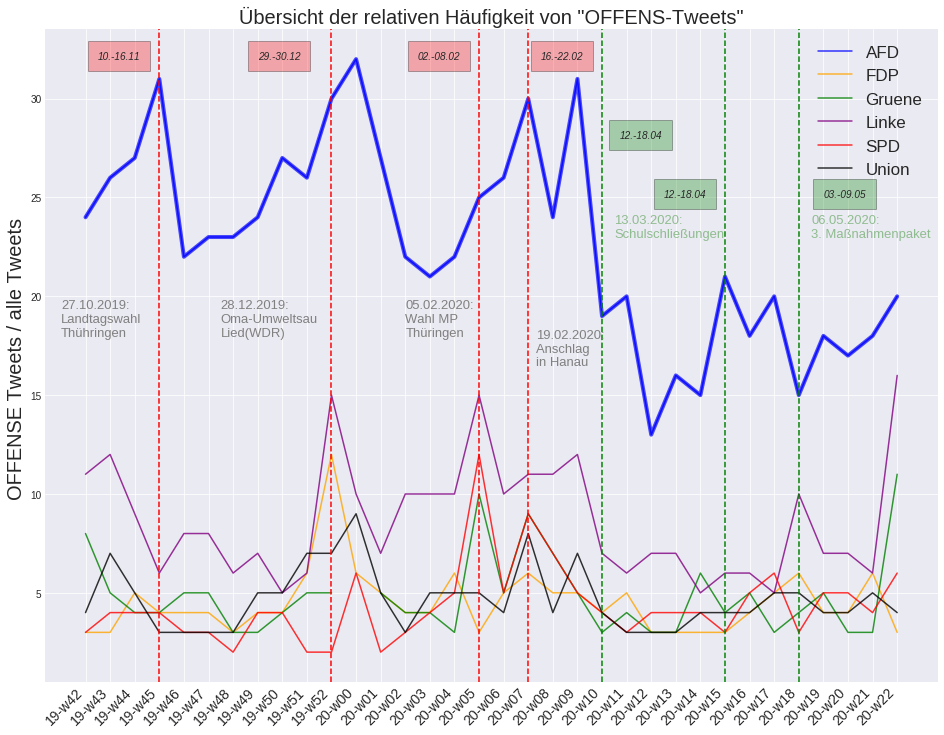

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

plt.style.use('seaborn-darkgrid')
my_palette = ['blue', 'orange', 'green', 'purple', 'red', 'black']

fig = plt.figure(figsize = (16, 12))
ax = fig.add_subplot(111)

num=0
for column in partei_piv_rel:
    ax.plot(partei_piv_rel.index, partei_piv_rel[column], color = my_palette[num], alpha=0.8, label = column)
    num+=1

ax.plot(partei_piv_rel.index, partei_piv_rel['AFD'], marker='', color='blue', linewidth=4, alpha=0.7)
#ax.plot(partei_piv_rel.index, partei_piv_rel['full_text']['SPD'], marker='', color='red', linewidth=4, alpha=0.7)
#ax.plot(partei_piv_rel.index, partei_piv_rel['full_text']['Linke'], marker='', color='purple', linewidth=4, alpha=0.7)
#ax.plot(partei_piv_rel.index, partei_piv_rel['full_text']['FDP'], marker='', color='orange', linewidth=4, alpha=0.7)

ax.set_title('Übersicht der relativen Häufigkeit von "OFFENS-Tweets"', size = 20)
ylab = ax.set_ylabel('OFFENSE Tweets / alle Tweets ', size = 20)
# = ax.set_xlabel('Datum', size = 20)
plt.legend(loc = 1, ncol = 1, fontsize = 17)

#x_tags
x_tags = plt.xticks(partei_piv_rel.index, fontsize = 14, rotation = 45, ha = "right")



# Verdeutlichungen in der Grafik
ax.axvline('19-w45', ls='--', color='r')
ax.text(0.5, 32, '10.-16.11', style='italic', bbox={'facecolor': 'red', 'alpha': 0.3, 'pad': 10})
ax.text(-1, 18, '27.10.2019:\nLandtagswahl\nThühringen', color='grey', fontsize=13)

ax.axvline('19-w52', ls='--', color='r')
ax.text(7, 32, '29.-30.12', style='italic', bbox={'facecolor': 'red', 'alpha': 0.3, 'pad': 10})
ax.text(5.5, 18, '28.12.2019:\nOma-Umweltsau\nLied(WDR)', color='grey', fontsize=13)

ax.axvline('20-w05', ls='--', color='r')
ax.text(13.5, 32, '02.-08.02', style='italic', bbox={'facecolor': 'red', 'alpha': 0.3, 'pad': 10})
ax.text(13, 18, '05.02.2020:\nWahl MP \nThüringen', color='grey', fontsize=13)

ax.axvline('20-w07', ls='--', color='r')
ax.text(18.5, 32, '16.-22.02', style='italic', bbox={'facecolor': 'red', 'alpha': 0.3, 'pad': 10})
ax.text(18.3, 16.5, '19.02.2020:\nAnschlag \nin Hanau', color='grey', fontsize=13)

ax.axvline('20-w10', ls='--', color='g')
ax.text(21.7, 28, '12.-18.04', style='italic', bbox={'facecolor': 'green', 'alpha': 0.3, 'pad': 10})
ax.text(21.5, 23, '13.03.2020:\nSchulschließungen', color='darkseagreen', fontsize=13)

ax.axvline('20-w15', ls='--', color='g')
ax.text(23.5, 25, '12.-18.04', style='italic', bbox={'facecolor': 'green', 'alpha': 0.3, 'pad': 10})


ax.axvline('20-w18', ls='--', color='g')
ax.text(30, 25, '03.-09.05', style='italic', bbox={'facecolor': 'green', 'alpha': 0.3, 'pad': 10})
ax.text(29.5, 23, '06.05.2020:\n3. Maßnahmenpaket', color='darkseagreen', fontsize=13)


### Absolute Übersicht

In [164]:
mdp_partei = sent_df_Wien[['user_party', 'week', 'date', 'user_screen_name', 'full_text', 'predict']]
mdp_partei = mdp_partei.loc[(mdp_partei['predict'] == 'OFFENSE') & (mdp_partei['date'] >= datetime.date(2019,10,25))]
partei_piv = pd.pivot_table(mdp_partei, columns = ['user_party'], index = ['week'], aggfunc = np.count_nonzero).fillna(0)
# partei_piv

Text(29.5, 100, '06.05.2020:\n3. Maßnahmenpaket')

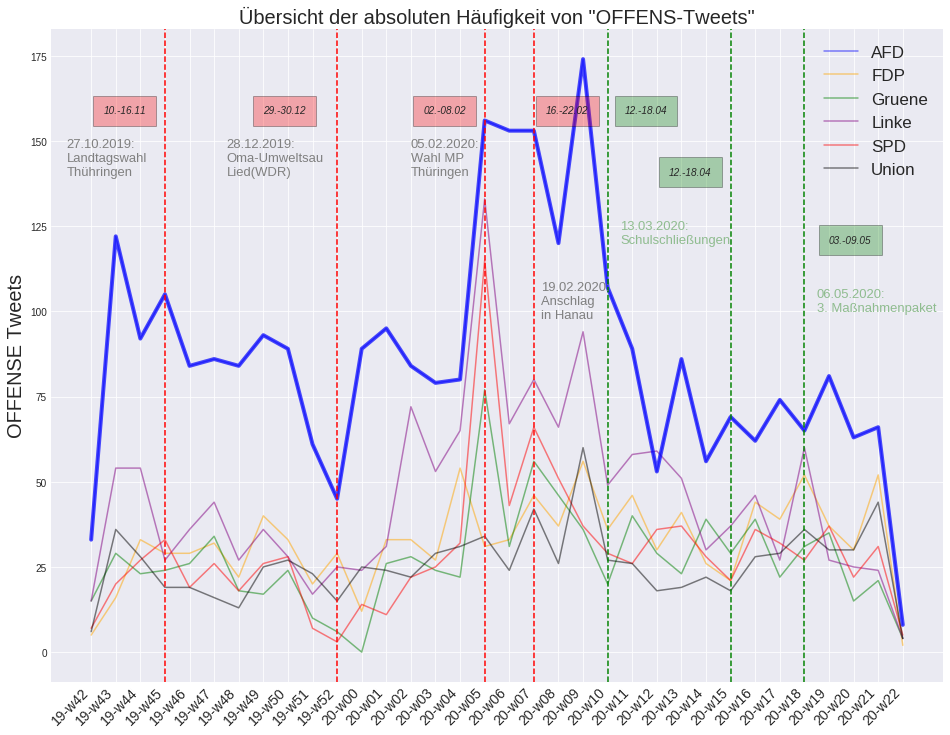

In [165]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

plt.style.use('seaborn-darkgrid')
my_palette = ['blue', 'orange', 'green', 'purple', 'red', 'black']

fig = plt.figure(figsize = (16, 12))
ax = fig.add_subplot(111)

num=0
for column in partei_piv['full_text']:
    ax.plot(partei_piv.index, partei_piv['full_text'][column], color = my_palette[num], alpha=0.5, label = column)
    num+=1

ax.plot(partei_piv.index, partei_piv['full_text']['AFD'], marker='', color='blue', linewidth=4, alpha=0.7)
#ax.plot(partei_piv.index, partei_piv['full_text']['SPD'], marker='', color='red', linewidth=4, alpha=0.7)
#ax.plot(partei_piv.index, partei_piv['full_text']['Linke'], marker='', color='purple', linewidth=4, alpha=0.7)
#ax.plot(partei_piv.index, partei_piv['full_text']['FDP'], marker='', color='orange', linewidth=4, alpha=0.7)
#ax.plot(partei_piv.index, partei_piv['full_text']['Union'], marker='', color='black', linewidth=4, alpha=0.7)
#ax.plot(partei_piv.index, partei_piv['full_text']['Gruene'], marker='', color='green', linewidth=4, alpha=0.7)

ax.set_title('Übersicht der absoluten Häufigkeit von "OFFENS-Tweets"', size = 20)
ylab = ax.set_ylabel('OFFENSE Tweets', size = 20)
# = ax.set_xlabel('Datum', size = 20)
plt.legend(loc = 1, ncol = 1, fontsize = 17)

#x_tags
x_tags = plt.xticks(partei_piv.index, fontsize = 14, rotation = 45, ha = "right")


# Verdeutlichungen in der Grafik
ax.axvline('19-w45', ls='--', color='r')
ax.text(0.5, 158, '10.-16.11', style='italic', bbox={'facecolor': 'red', 'alpha': 0.3, 'pad': 10})
ax.text(-1, 140, '27.10.2019:\nLandtagswahl\nThühringen', color='grey', fontsize=13)

ax.axvline('19-w52', ls='--', color='r')
ax.text(7, 158, '29.-30.12', style='italic', bbox={'facecolor': 'red', 'alpha': 0.3, 'pad': 10})
ax.text(5.5, 140, '28.12.2019:\nOma-Umweltsau\nLied(WDR)', color='grey', fontsize=13)

ax.axvline('20-w05', ls='--', color='r')
ax.text(13.5, 158, '02.-08.02', style='italic', bbox={'facecolor': 'red', 'alpha': 0.3, 'pad': 10})
ax.text(13, 140, '05.02.2020:\nWahl MP \nThüringen', color='grey', fontsize=13)

ax.axvline('20-w07', ls='--', color='r')
ax.text(18.5, 158, '16.-22.02', style='italic', bbox={'facecolor': 'red', 'alpha': 0.3, 'pad': 10})
ax.text(18.3, 98, '19.02.2020:\nAnschlag \nin Hanau', color='grey', fontsize=13)

ax.axvline('20-w10', ls='--', color='g')
ax.text(21.7, 158, '12.-18.04', style='italic', bbox={'facecolor': 'green', 'alpha': 0.3, 'pad': 10})
ax.text(21.5, 120, '13.03.2020:\nSchulschließungen', color='darkseagreen', fontsize=13)

ax.axvline('20-w15', ls='--', color='g')
ax.text(23.5, 140, '12.-18.04', style='italic', bbox={'facecolor': 'green', 'alpha': 0.3, 'pad': 10})


ax.axvline('20-w18', ls='--', color='g')
ax.text(30, 120, '03.-09.05', style='italic', bbox={'facecolor': 'green', 'alpha': 0.3, 'pad': 10})
ax.text(29.5, 100, '06.05.2020:\n3. Maßnahmenpaket', color='darkseagreen', fontsize=13)



### Anteil der OFFENSE Tweets über den gesammten Datensatz hinweg

In [166]:
mdp_partei = sent_df_Wien[['user_party', 'month', 'user_screen_name', 'full_text', 'predict']]
# mdp_partei = mdp_partei[mdp_partei['predict'] == 'OFFENSE']
partei_piv_perc = pd.pivot_table(mdp_partei, columns = ['predict'], index = ['user_party'], aggfunc = np.count_nonzero).fillna(0)
partei_piv_perc['full_text']

predict     OFFENSE  OTHER
user_party                
AFD            4771  16287
FDP            1699  37549
Gruene         1550  31563
Linke          2659  27295
SPD            1590  35381
Union          1453  31382

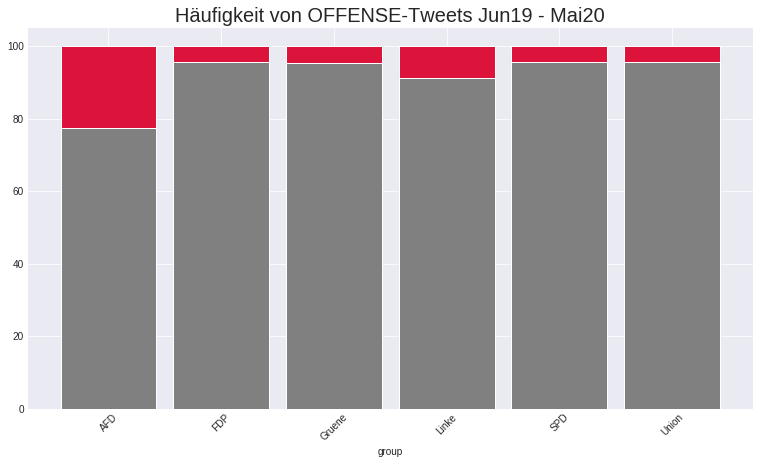

In [167]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# Data
# r = [0,1,2,3,4]
raw_data = {'greenBars': partei_piv_perc['full_text']['OTHER'].values, 'orangeBars': partei_piv_perc['full_text']['OFFENSE'].values}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
 
# plot
barWidth = 0.85
names = partei_piv_perc['full_text'].index
fig = plt.figure(figsize = (13, 7))
ax = fig.add_subplot(111)

# Create green Bars
ax.bar(partei_piv_perc['full_text'].index, greenBars, color='grey', edgecolor='white', width=barWidth)
# Create orange Bars
ax.bar(partei_piv_perc['full_text'].index, orangeBars, bottom=greenBars, color='crimson', edgecolor='white', width=barWidth)

ax.set_title('Häufigkeit von OFFENSE-Tweets Jun19 - Mai20', size = 20)
# Custom x axis
plt.xticks(names, rotation =45)
plt.xlabel("group")
 
# Show graphic
plt.show()

# Zeitraum Ansichten

### Oma Umweltsau Lied (WDR) am 28.12.2019

In [168]:
mdp_partei = sent_df_Wien[['user_party', 'week', 'date', 'user_screen_name', 'full_text', 'predict']]

# Zähler
mdp_WDR_nom = mdp_partei.loc[(mdp_partei['predict'] == 'OFFENSE') 
                                & (mdp_partei['date'] >= datetime.date(2019,12,24)) 
                                & (mdp_partei['date'] <= datetime.date(2020,1,11))]

WDR_piv_nom = pd.pivot_table(mdp_WDR_nom, columns = ['user_party'], index = ['date'], aggfunc = np.count_nonzero).fillna(0)
WDR_piv_nom = WDR_piv_nom['full_text']

# Nenner
mdp_WDR_denom = mdp_partei.loc[(mdp_partei['date'] >= datetime.date(2019,12,24)) 
                                  & (mdp_partei['date'] <= datetime.date(2020,1,11))]
WDR_piv_denom = pd.pivot_table(mdp_WDR_denom, columns = ['user_party'], index = ['date'], aggfunc = np.count_nonzero).fillna(0)
WDR_piv_denom = WDR_piv_denom['full_text']

# Relative Werte
WDR_piv_rel = (WDR_piv_nom/WDR_piv_denom) * 100
WDR_piv_rel = WDR_piv_rel.round()
#WDR_piv_rel = WDR_piv_nom

Text(0.5, 0.07, ' @FELIANNE1 @zardorak @ArminLaschet\nMan kann halt auch blind und taub sein.\nVor Ort wurde u. a. ein Lied mit antisem. Verschwörungen \n("Vereinigten Staaten die in Israels Auftrag die Welt versklaven") \nvorgetragen. \nUnd auf dem Bild unten sind keine Omas und Opas, \nsondern Nazi-Hooligans. \nhttps://t.co/ilbGy1ReKq')

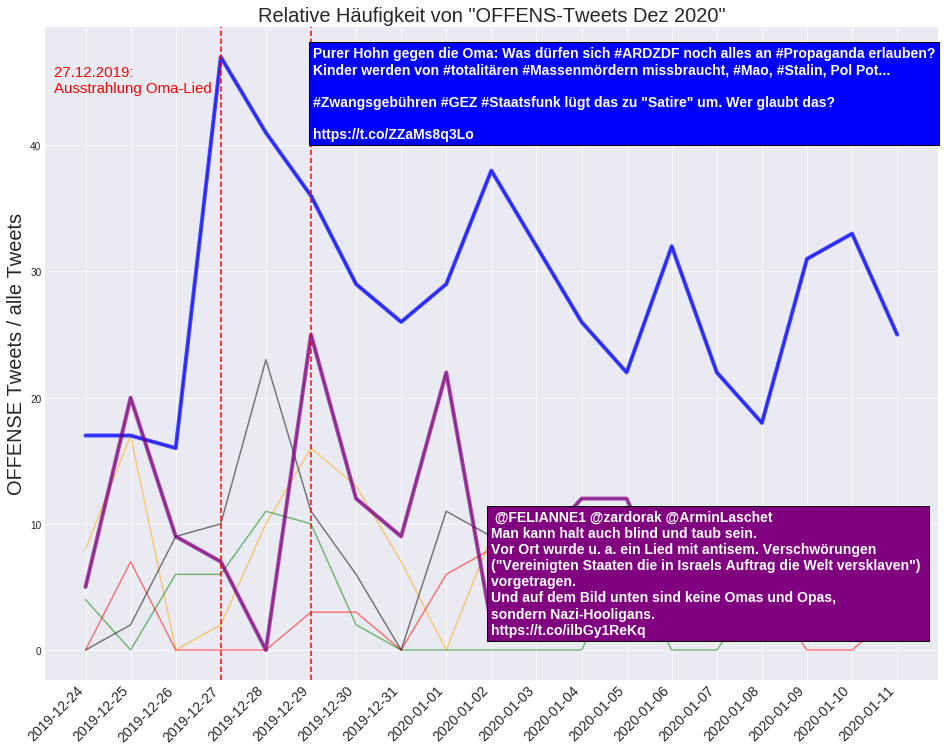

In [169]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

plt.style.use('seaborn-darkgrid')
my_palette = ['blue', 'orange', 'green', 'purple', 'red', 'black']

fig = plt.figure(figsize = (16, 12))
ax = fig.add_subplot(111)

num=0
for column in WDR_piv_rel:
    ax.plot(WDR_piv_rel.index, WDR_piv_rel[column], color = my_palette[num], alpha=0.5, label = column)
    num+=1

ax.plot(WDR_piv_rel.index, WDR_piv_rel['AFD'], marker='', color='blue', linewidth=4, alpha=0.7)
ax.plot(WDR_piv_rel.index, WDR_piv_rel['Linke'], marker='', color='purple', linewidth=4, alpha=0.7)

ax.set_title('Relative Häufigkeit von "OFFENS-Tweets Dez 2020"', size = 20)
ylab = ax.set_ylabel('OFFENSE Tweets / alle Tweets', size = 20)
# = ax.set_xlabel('Datum', size = 20)
#plt.legend(loc = 1, ncol = 2, fontsize = 17)

#x_tags
x_tags = plt.xticks(WDR_piv_rel.index, fontsize = 14, rotation = 45, ha = "right")

# # Verdeutlichungen in der Grafik
ax.axvline(datetime.date(2019,12,27), ls='--', color='r')
ax.text(0.01, 0.9, '27.12.2019: \nAusstrahlung Oma-Lied', color='red', fontsize=15, transform=ax.transAxes)
ax.text(0.3, 0.83, 'Purer Hohn gegen die Oma: Was dürfen sich #ARDZDF noch alles an #Propaganda erlauben?\nKinder werden von #totalitären #Massenmördern missbraucht, #Mao, #Stalin, Pol Pot...\n\n#Zwangsgebühren #GEZ #Staatsfunk lügt das zu "Satire" um. Wer glaubt das?\n\nhttps://t.co/ZZaMs8q3Lo', 
        color='w', weight = 'bold', fontsize = 14, bbox={'facecolor': 'blue'}, transform=ax.transAxes)


ax.axvline(datetime.date(2019,12,29), ls='--', color='r')
ax.text(0.5, 0.07, ' @FELIANNE1 @zardorak @ArminLaschet\nMan kann halt auch blind und taub sein.\nVor Ort wurde u. a. ein Lied mit antisem. Verschwörungen \n("Vereinigten Staaten die in Israels Auftrag die Welt versklaven") \nvorgetragen. \nUnd auf dem Bild unten sind keine Omas und Opas, \nsondern Nazi-Hooligans. \nhttps://t.co/ilbGy1ReKq', 
        color='w', weight = 'bold', fontsize = 14, bbox={'facecolor': 'purple'}, transform=ax.transAxes)


In [13]:
pd.set_option('display.max_colwidth', None)
sent_df_Wien.loc[(sent_df_Wien['date'] == datetime.date(2019,12,29)) 
                 & (sent_df_Wien['user_party'] == 'Linke')
                 & (sent_df_Wien['predict'] == 'OFFENSE')
                ]['full_text']

1862                                  @sybille_zeisel @EinAugenschmaus @Hauptgarnix Mein Sohn ist 19, seine Oma u Opa, meine Eltern, aber auch beide Großeltern väterlicherseits, haben den Krieg erlebt. Ich hatte 10 Jahre nach seiner Geburt mehrere Fehlgeburten. Diese Kinder wären heute 9 Jahre alt, u hätten auch Kriegsgroßeltern.
2145                                                                                            Für alle Hater: Die letzte Zeile des #Umweltsau-Liedes ist: "Meine Oma ist doch keine Umweltsau". Ich wiederhole: "Meine Oma ist doch keine Umweltsau."\nSo, nun Schnappatmung beenden, entspannen und aufs neue Jahr freuen. \n#WDR #koeln
2149                                                                                                                                                                                                                     @rektumpeter @tauss Natürlich sind das Nazis. Man muss schon blind auf dem rechten Auge sein, dass nicht zu sehen.
2152

### Thüringen MP Wahl am 05.02.2020

In [170]:
mdp_partei = sent_df_Wien[['user_party', 'week', 'date', 'user_screen_name', 'full_text', 'predict']]

# Zähler
mdp_TW_nom = mdp_partei.loc[(mdp_partei['predict'] == 'OFFENSE') 
                                & (mdp_partei['date'] >= datetime.date(2020,1,13)) 
                                & (mdp_partei['date'] <= datetime.date(2020,2,14))]

TW_piv_nom = pd.pivot_table(mdp_TW_nom, columns = ['user_party'], index = ['date'], aggfunc = np.count_nonzero).fillna(0)
TW_piv_nom = TW_piv_nom['full_text']

# Nenner
mdp_TW_denom = mdp_partei.loc[(mdp_partei['date'] >= datetime.date(2020,1,13)) 
                                  & (mdp_partei['date'] <= datetime.date(2020,2,14))]
TW_piv_denom = pd.pivot_table(mdp_TW_denom, columns = ['user_party'], index = ['date'], aggfunc = np.count_nonzero).fillna(0)
TW_piv_denom = TW_piv_denom['full_text']

# Relative Werte
TW_piv_rel = (TW_piv_nom/TW_piv_denom) * 100
TW_piv_rel = TW_piv_rel.round()
#TW_piv_rel = TW_piv_nom

Text(0.71, 0.75, '05.02.2020:\nWahl MP \nThüringen')

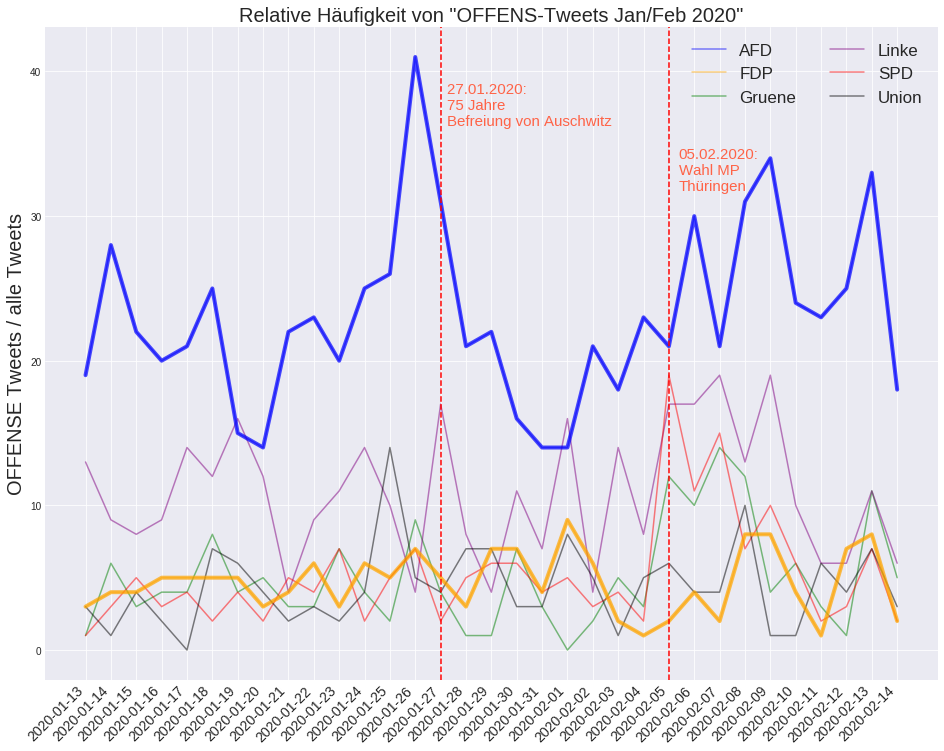

In [171]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

plt.style.use('seaborn-darkgrid')
my_palette = ['blue', 'orange', 'green', 'purple', 'red', 'black']

fig = plt.figure(figsize = (16, 12))
ax = fig.add_subplot(111)

num=0
for column in TW_piv_rel:
    ax.plot(TW_piv_rel.index, TW_piv_rel[column], color = my_palette[num], alpha=0.5, label = column)
    num+=1

ax.plot(TW_piv_rel.index, TW_piv_rel['AFD'], marker='', color='blue', linewidth=4, alpha=0.7)
ax.plot(TW_piv_rel.index, TW_piv_rel['FDP'], marker='', color='orange', linewidth=4, alpha=0.7)

ax.set_title('Relative Häufigkeit von "OFFENS-Tweets Jan/Feb 2020"', size = 20)
ylab = ax.set_ylabel('OFFENSE Tweets / alle Tweets', size = 20)
# = ax.set_xlabel('Datum', size = 20)
plt.legend(loc = 1, ncol = 2, fontsize = 17)

#x_tags
x_tags = plt.xticks(TW_piv_rel.index, fontsize = 14, rotation = 45, ha = "right")

# # Verdeutlichungen in der Grafik
ax.axvline(datetime.date(2020,1,27), ls='--', color='r')
ax.text(0.45, 0.85, '27.01.2020: \n75 Jahre \nBefreiung von Auschwitz', color='tomato', fontsize=15, transform=ax.transAxes)

ax.axvline(datetime.date(2020,2,5), ls='--', color='r')
ax.text(0.71, 0.75, '05.02.2020:\nWahl MP \nThüringen', color='tomato', fontsize=15, transform=ax.transAxes)


In [172]:
mdp_partei = sent_df_Wien[['user_party', 'week', 'date', 'user_screen_name', 'full_text', 'predict']]
mdp_TW_nom = mdp_partei.loc[(mdp_partei['predict'] == 'OFFENSE') 
                                & (mdp_partei['date'] >= datetime.date(2020,1,13)) 
                                & (mdp_partei['date'] <= datetime.date(2020,2,14))]
TW_piv_nom = pd.pivot_table(mdp_TW_nom, columns = ['user_party'], index = ['date'], aggfunc = np.count_nonzero).fillna(0)
TW_piv_nom = TW_piv_nom['full_text']

Text(0.72, 0.77, '05.02.2020:\nWahl MP \nThüringen')

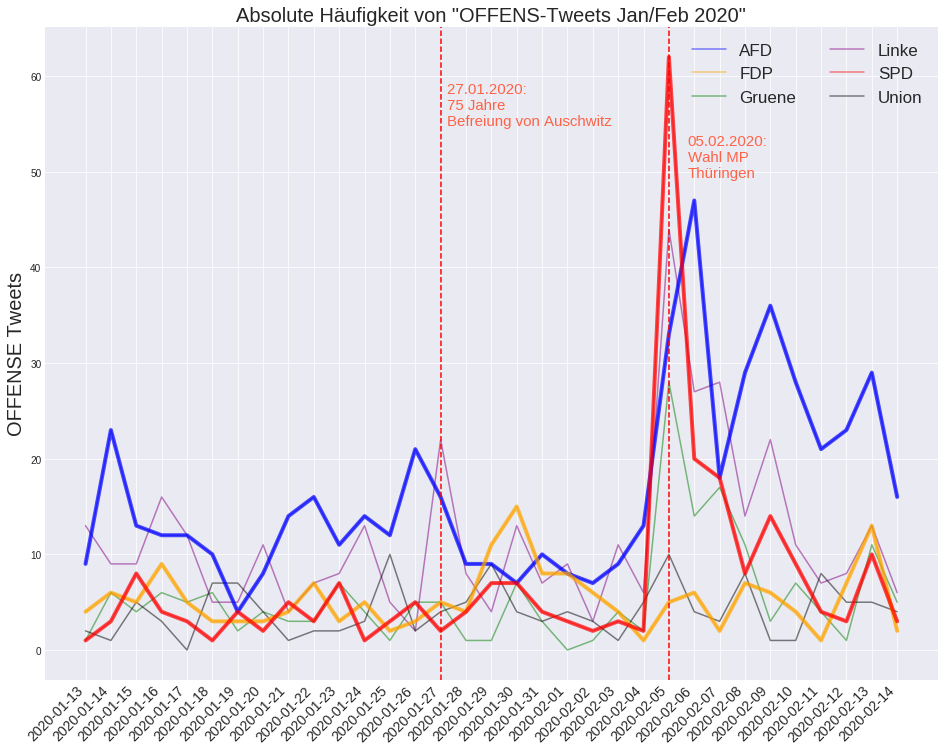

In [173]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

plt.style.use('seaborn-darkgrid')
my_palette = ['blue', 'orange', 'green', 'purple', 'red', 'black']

fig = plt.figure(figsize = (16, 12))
ax = fig.add_subplot(111)

num=0
for column in TW_piv_nom:
    ax.plot(TW_piv_nom.index, TW_piv_nom[column], color = my_palette[num], alpha=0.5, label = column)
    num+=1

ax.plot(TW_piv_nom.index, TW_piv_nom['AFD'], marker='', color='blue', linewidth=4, alpha=0.7)
ax.plot(TW_piv_nom.index, TW_piv_nom['FDP'], marker='', color='orange', linewidth=4, alpha=0.7)
ax.plot(TW_piv_nom.index, TW_piv_nom['SPD'], marker='', color='red', linewidth=4, alpha=0.7)

ax.set_title('Absolute Häufigkeit von "OFFENS-Tweets Jan/Feb 2020"', size = 20)
ylab = ax.set_ylabel('OFFENSE Tweets', size = 20)
# = ax.set_xlabel('Datum', size = 20)
plt.legend(loc = 1, ncol = 2, fontsize = 17)

#x_tags
x_tags = plt.xticks(TW_piv_nom.index, fontsize = 14, rotation = 45, ha = "right")

# # Verdeutlichungen in der Grafik
ax.axvline(datetime.date(2020,1,27), ls='--', color='r')
ax.text(0.45, 0.85, '27.01.2020: \n75 Jahre \nBefreiung von Auschwitz', color='tomato', fontsize=15, transform=ax.transAxes)

ax.axvline(datetime.date(2020,2,5), ls='--', color='r')
ax.text(0.72, 0.77, '05.02.2020:\nWahl MP \nThüringen', color='tomato', fontsize=15, transform=ax.transAxes)


In [18]:
pd.set_option('display.max_colwidth', None)
sent_df_Wien.loc[(sent_df_Wien['date'] == datetime.date(2020,1,27)) 
                 & (sent_df_Wien['user_party'] == 'Union')
                 & (sent_df_Wien['predict'] == 'OFFENSE')
                ]['full_text']

3626                     Essen verdient also den niedrigsten Preis. Sagt die Kette, die behauptet, Lebensmittel zu lieben. Was denn nun? Doppelmoral oder mangelnder Durchblick? Lebensmittel haben einen Wert. Sie verdienen mehr. #EDEKA https://t.co/czewrZ9GeL
4299    Wir stehen heute mehr denn je in der Pflicht und Verantwortung, jüdisches Leben in Deutschland zu schützen. Jeder einzelne von uns ist aufgerufen, Hass, Hetze und Rassenwahn entgegenzutreten, ob auf der Straße oder in den sozialen Medien. #WeRemember
8110                                                                                                                                                                                                                    @DietmarBartsch @hubertus_heil @SZ Unsinn.
8720                                                                                                                                                                    @GabbaGa21602277 @Frank_Pasemann Solche wie „jagen und 

### Anschlag in Hanau am 19.02.2020

In [174]:
mdp_partei = sent_df_Wien[['user_party', 'week', 'date', 'user_screen_name', 'full_text', 'predict']]

# Zähler
mdp_Hanau_nom = mdp_partei.loc[(mdp_partei['predict'] == 'OFFENSE') 
                                & (mdp_partei['date'] >= datetime.date(2020,2,15)) 
                                & (mdp_partei['date'] <= datetime.date(2020,3,1))]

Hanau_piv_nom = pd.pivot_table(mdp_Hanau_nom, columns = ['user_party'], index = ['date'], aggfunc = np.count_nonzero).fillna(0)
Hanau_piv_nom = Hanau_piv_nom['full_text']

# Nenner
mdp_Hanau_denom = mdp_partei.loc[(mdp_partei['date'] >= datetime.date(2020,2,15)) 
                                  & (mdp_partei['date'] <= datetime.date(2020,3,1))]
Hanau_piv_denom = pd.pivot_table(mdp_Hanau_denom, columns = ['user_party'], index = ['date'], aggfunc = np.count_nonzero).fillna(0)
Hanau_piv_denom = Hanau_piv_denom['full_text']

# Relative Werte
Hanau_piv_rel = (Hanau_piv_nom/Hanau_piv_denom) * 100
Hanau_piv_rel = Hanau_piv_rel.round()
# Hanau_piv_rel

Text(0.28, 0.5, '19.02.2020: Anschlag von Hanau')

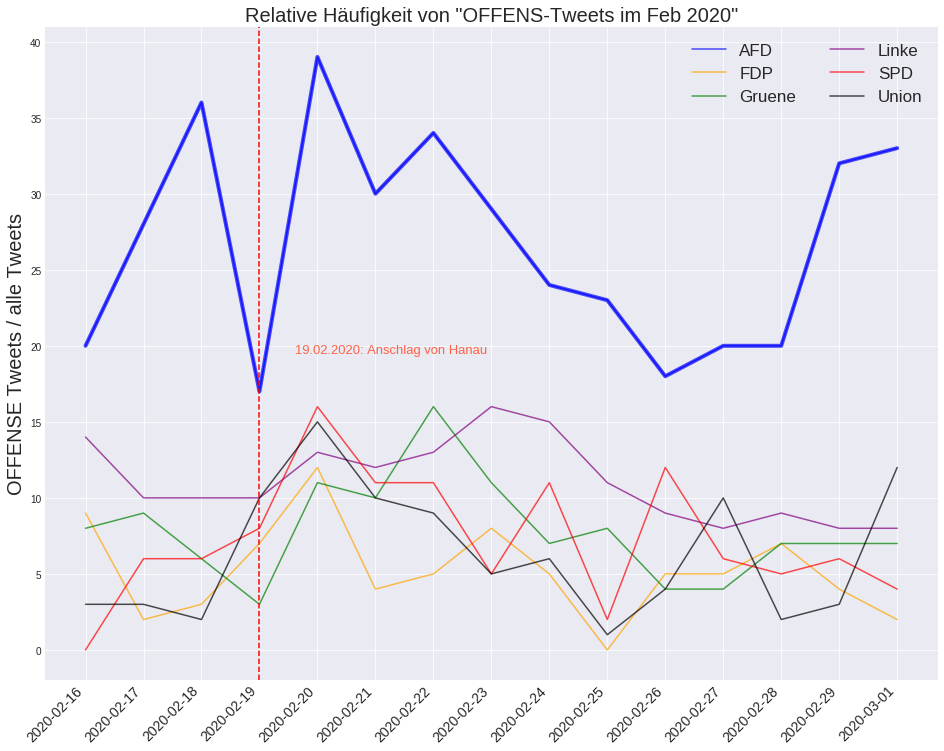

In [175]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

plt.style.use('seaborn-darkgrid')
my_palette = ['blue', 'orange', 'green', 'purple', 'red', 'black']

fig = plt.figure(figsize = (16, 12))
ax = fig.add_subplot(111)

num=0
for column in Hanau_piv_rel:
    ax.plot(Hanau_piv_rel.index, Hanau_piv_rel[column], color = my_palette[num], alpha=0.7, label = column)
    num+=1

ax.plot(Hanau_piv_rel.index, Hanau_piv_rel['AFD'], marker='', color='blue', linewidth=4, alpha=0.7)

ax.set_title('Relative Häufigkeit von "OFFENS-Tweets im Feb 2020"', size = 20)
ylab = ax.set_ylabel('OFFENSE Tweets / alle Tweets', size = 20)
# = ax.set_xlabel('Datum', size = 20)
plt.legend(loc = 1, ncol = 2, fontsize = 17)

#x_tags
x_tags = plt.xticks(Hanau_piv_rel.index, fontsize = 14, rotation = 45, ha = "right")

ax.axvline(datetime.date(2020,2,19), ls='--', color='r')
ax.text(0.28, 0.5, '19.02.2020: Anschlag von Hanau', color='tomato', fontsize=13, transform=ax.transAxes)


Text(0.01, 0.95, '19.02.2020: Anschlag von Hanau')

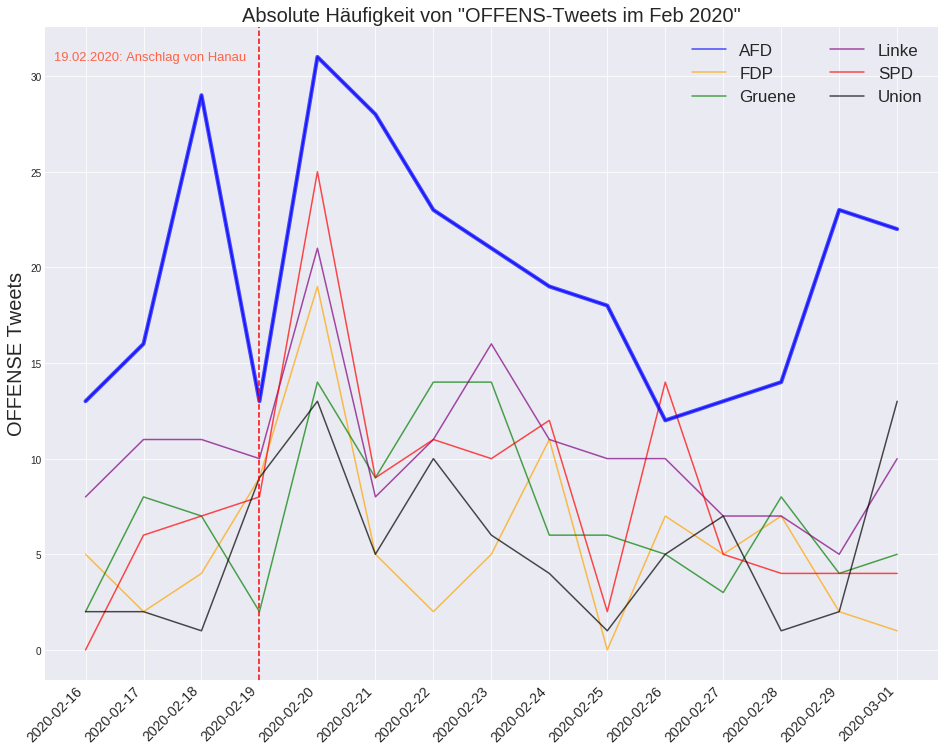

In [176]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

plt.style.use('seaborn-darkgrid')
my_palette = ['blue', 'orange', 'green', 'purple', 'red', 'black']

fig = plt.figure(figsize = (16, 12))
ax = fig.add_subplot(111)

num=0
for column in Hanau_piv_nom:
    ax.plot(Hanau_piv_nom.index, Hanau_piv_nom[column], color = my_palette[num], alpha=0.7, label = column)
    num+=1

ax.plot(Hanau_piv_nom.index, Hanau_piv_nom['AFD'], marker='', color='blue', linewidth=4, alpha=0.7)

ax.set_title('Absolute Häufigkeit von "OFFENS-Tweets im Feb 2020"', size = 20)
ylab = ax.set_ylabel('OFFENSE Tweets', size = 20)
# = ax.set_xlabel('Datum', size = 20)
plt.legend(loc = 1, ncol = 2, fontsize = 17)

#x_tags
x_tags = plt.xticks(Hanau_piv_nom.index, fontsize = 14, rotation = 45, ha = "right")

ax.axvline(datetime.date(2020,2,19), ls='--', color='r')
ax.text(0.01, 0.95, '19.02.2020: Anschlag von Hanau', color='tomato', fontsize=13, transform=ax.transAxes)


In [177]:
# pd.set_option('display.max_colwidth', None)
# sent_df_Wien.loc[(sent_df_Wien['date'] == datetime.date(2020,2,20)) 
#                  & (sent_df_Wien['user_party'] == 'AFD')
#                  & (sent_df_Wien['predict'] == 'OFFENSE')
#                 ]['full_text']

In [178]:
mdp_partei = sent_df_Wien[['user_party', 'week', 'date', 'user_screen_name', 'full_text', 'predict']]

# Zähler
mdp_Corona_nom = mdp_partei.loc[(mdp_partei['predict'] == 'OFFENSE') 
                                & (mdp_partei['date'] >= datetime.date(2020,3,1)) 
                                & (mdp_partei['date'] <= datetime.date(2020,5,10))]

Corona_piv_nom = pd.pivot_table(mdp_Corona_nom, columns = ['user_party'], index = ['date'], aggfunc = np.count_nonzero).fillna(0)
Corona_piv_nom = Corona_piv_nom['full_text']

# Nenner
mdp_Corona_denom = mdp_partei.loc[(mdp_partei['date'] >= datetime.date(2020,3,1)) 
                                  & (mdp_partei['date'] <= datetime.date(2020,5,10))]
Corona_piv_denom = pd.pivot_table(mdp_Corona_denom, columns = ['user_party'], index = ['date'], aggfunc = np.count_nonzero).fillna(0)
Corona_piv_denom = Corona_piv_denom['full_text']

# Relative Werte
Corona_piv_rel = (Corona_piv_nom/Corona_piv_denom) * 100
Corona_piv_rel = Corona_piv_rel.round()
# Corona_piv_rel

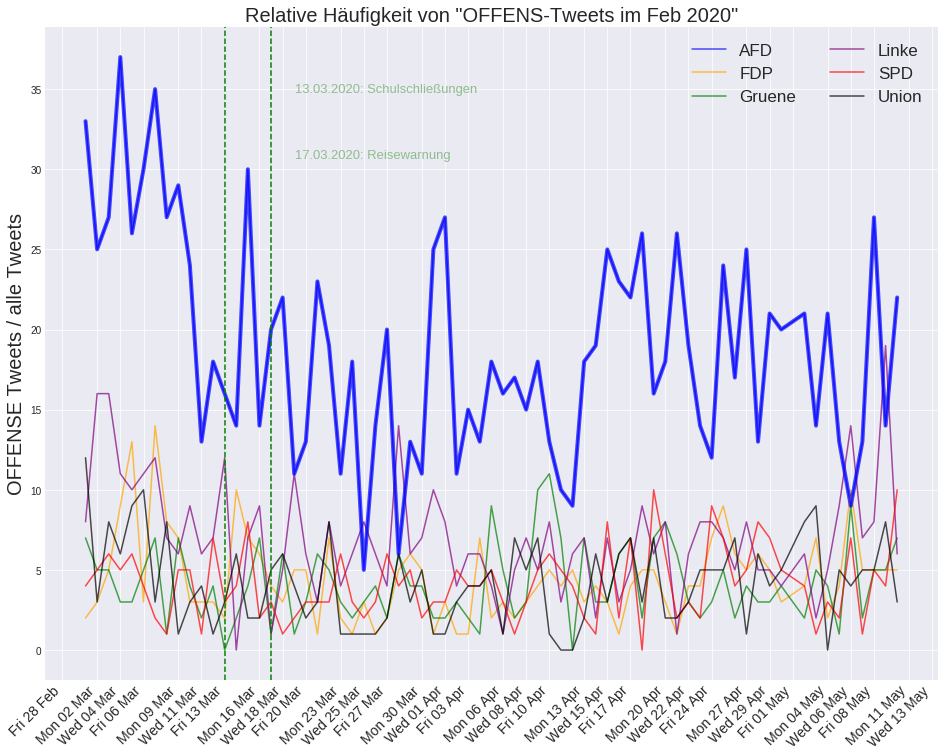

In [180]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
import pandas as pd
import numpy as np

plt.style.use('seaborn-darkgrid')
my_palette = ['blue', 'orange', 'green', 'purple', 'red', 'black']

fig = plt.figure(figsize = (16, 12))
ax = fig.add_subplot(111)

num=0
for column in Corona_piv_rel:
    ax.plot(Corona_piv_rel.index, Corona_piv_rel[column], color = my_palette[num], alpha=0.7, label = column)
    num+=1

ax.plot(Corona_piv_rel.index, Corona_piv_rel['AFD'], marker='', color='blue', linewidth=4, alpha=0.7)

ax.set_title('Relative Häufigkeit von "OFFENS-Tweets im Feb 2020"', size = 20)
ylab = ax.set_ylabel('OFFENSE Tweets / alle Tweets', size = 20)
# = ax.set_xlabel('Datum', size = 20)
plt.legend(loc = 1, ncol = 2, fontsize = 17)

#x_tags
x_tags = plt.xticks(Corona_piv_rel.index, fontsize = 14, rotation = 45, ha = "right")

ax.axvline(datetime.date(2020,3,13), ls='--', color='g')
ax.text(0.28, 0.9, '13.03.2020: Schulschließungen', color='darkseagreen', fontsize=13, transform=ax.transAxes)

ax.axvline(datetime.date(2020,3,17), ls='--', color='g')
ax.text(0.28, 0.8, '17.03.2020: Reisewarnung', color='darkseagreen', fontsize=13, transform=ax.transAxes)

# x-tags
weekdays = mdates.WeekdayLocator(byweekday=(MO, WE, FR), interval=1)
weekdays_fmt = mdates.DateFormatter('%a %d %b')


ax.xaxis.set_major_locator(weekdays)
ax.xaxis.set_major_formatter(weekdays_fmt)



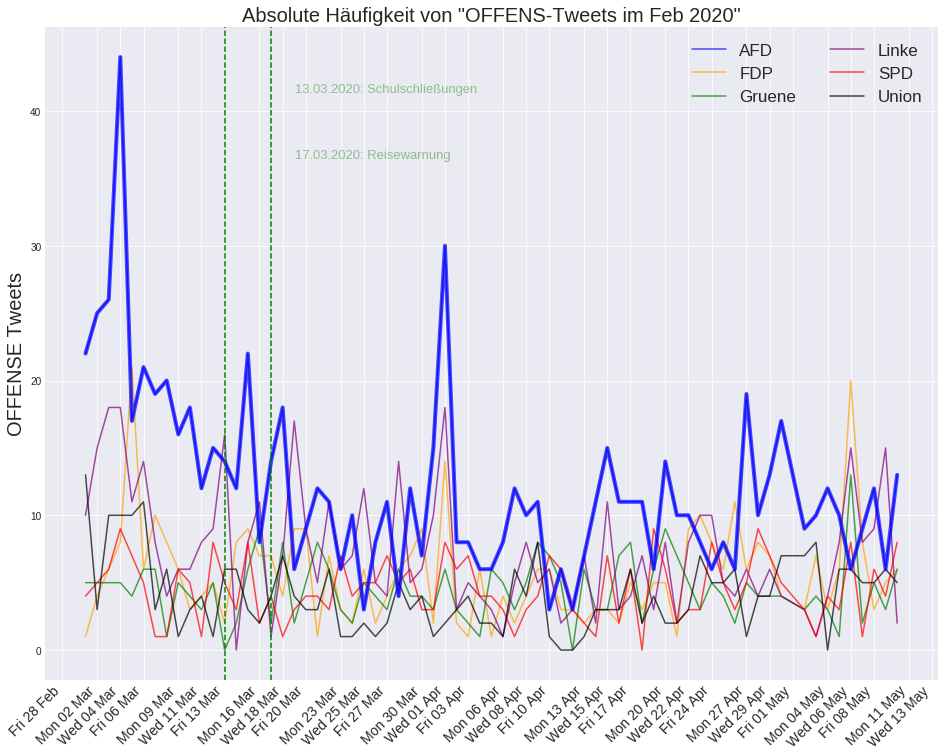

In [181]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

plt.style.use('seaborn-darkgrid')
my_palette = ['blue', 'orange', 'green', 'purple', 'red', 'black']

fig = plt.figure(figsize = (16, 12))
ax = fig.add_subplot(111)

num=0
for column in Corona_piv_nom:
    ax.plot(Corona_piv_nom.index, Corona_piv_nom[column], color = my_palette[num], alpha=0.7, label = column)
    num+=1

ax.plot(Corona_piv_nom.index, Corona_piv_nom['AFD'], marker='', color='blue', linewidth=4, alpha=0.7)

ax.set_title('Absolute Häufigkeit von "OFFENS-Tweets im Feb 2020"', size = 20)
ylab = ax.set_ylabel('OFFENSE Tweets', size = 20)
# = ax.set_xlabel('Datum', size = 20)
plt.legend(loc = 1, ncol = 2, fontsize = 17)

#x_tags
x_tags = plt.xticks(Corona_piv_nom.index, fontsize = 14, rotation = 45, ha = "right")

ax.axvline(datetime.date(2020,3,13), ls='--', color='g')
ax.text(0.28, 0.9, '13.03.2020: Schulschließungen', color='darkseagreen', fontsize=13, transform=ax.transAxes)

ax.axvline(datetime.date(2020,3,17), ls='--', color='g')
ax.text(0.28, 0.8, '17.03.2020: Reisewarnung', color='darkseagreen', fontsize=13, transform=ax.transAxes)


# x-tags
weekdays = mdates.WeekdayLocator(byweekday=(MO, WE, FR), interval=1)
weekdays_fmt = mdates.DateFormatter('%a %d %b')


ax.xaxis.set_major_locator(weekdays)
ax.xaxis.set_major_formatter(weekdays_fmt)



In [43]:
# pd.set_option('display.max_colwidth', None)
# sent_df_Wien.loc[(sent_df_Wien['date'] == datetime.date(2020,3,13)) 
#                  & (sent_df_Wien['user_party'] == 'AFD')
#                  & (sent_df_Wien['predict'] == 'OTHER')
#                 ]

# Stichwortsuchen im Datensatz

### Topic: Merkel

In [213]:
sent_Merkel = sent_df_Wien[sent_df_Wien['full_text_processed'].str.match(r'(.*Merkel.*)(?i)')==True]

sent_Merkel_piv = pd.pivot_table(sent_Merkel, columns = ['user_party'], index = ['predict'], aggfunc = np.count_nonzero)
sent_Merkel_piv['full_text_processed']

user_party  AFD  FDP  Gruene  Linke  SPD  Union
predict                                        
OFFENSE     367   35      30     37   23     23
OTHER       624  240     208    158  101    217

In [227]:
sent_Merkel = sent_df_Wien[sent_df_Wien['full_text_processed'].str.match(r'(.*Merkel.*)(?i)')==True]

sent_Merkel = sent_Merkel.loc[
                            #(sent_Merkel['date']>=datetime.date(2020,1,1))
                              (sent_Merkel['predict'] == 'OFFENSE')
                             ]

sent_Merkel_piv = pd.pivot_table(sent_Merkel, columns = ['user_party'], index = ['week'], aggfunc = np.count_nonzero).fillna(0)
sent_Merkel_piv = sent_Merkel_piv['full_text']

Text(0.42, 0.9, 'Anfang Februar: MP Wahl in \nThüringen und die Folgen')

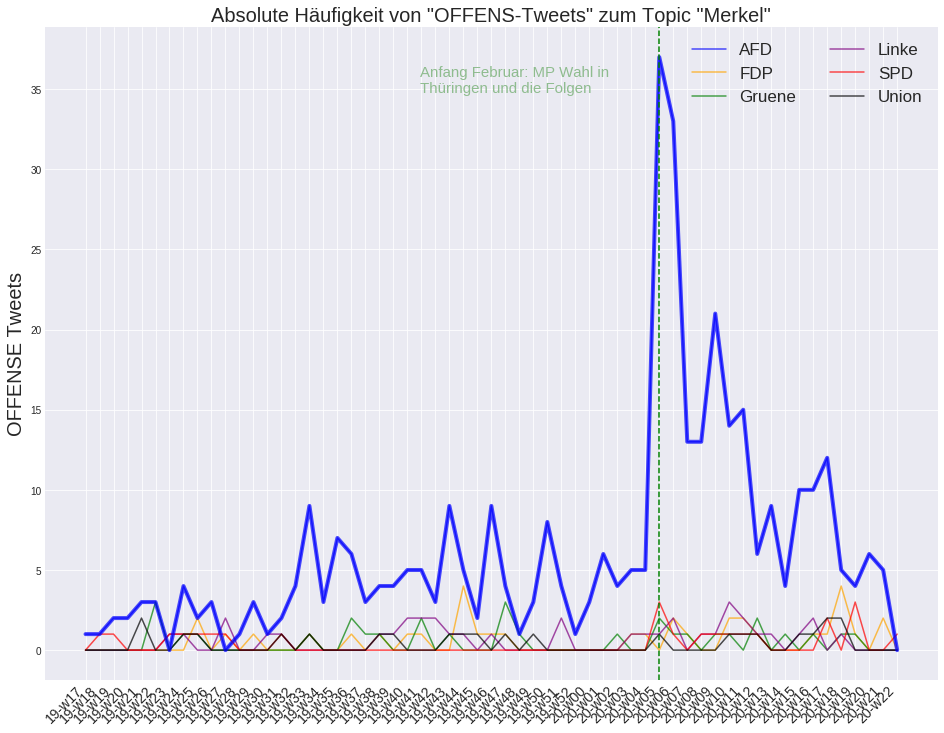

In [251]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

plt.style.use('seaborn-darkgrid')
my_palette = ['blue', 'orange', 'green', 'purple', 'red', 'black']

fig = plt.figure(figsize = (16, 12))
ax = fig.add_subplot(111)

num=0
for column in sent_Merkel_piv:
    ax.plot(sent_Merkel_piv.index, sent_Merkel_piv[column], color = my_palette[num], alpha=0.7, label = column)
    num+=1

ax.plot(sent_Merkel_piv.index, sent_Merkel_piv['AFD'], marker='', color='blue', linewidth=4, alpha=0.7)

ax.set_title('Absolute Häufigkeit von "OFFENS-Tweets" zum Topic "Merkel"', size = 20)
ylab = ax.set_ylabel('OFFENSE Tweets', size = 20)
# = ax.set_xlabel('Datum', size = 20)
plt.legend(loc = 1, ncol = 2, fontsize = 17)

#x_tags
x_tags = plt.xticks(sent_Merkel_piv.index, fontsize = 14, rotation = 45, ha = "right")

ax.axvline('20-w05', ls='--', color='g')
ax.text(0.42, 0.9, 'Anfang Februar: MP Wahl in \nThüringen und die Folgen', color='darkseagreen', fontsize=15, transform=ax.transAxes)


### Topic: Migration

In [123]:
sent_Mig = sent_df_Wien[sent_df_Wien['full_text_processed'].str.match(r'(.*Migration.*|.*Migrant.*|.*Flücht.*|.*Asyl.*)(?i)')==True]

sent_Mig_piv = pd.pivot_table(sent_Mig, columns = ['user_party'], index = ['predict'], aggfunc = np.count_nonzero)
sent_Mig_piv['full_text_processed']

user_party  AFD  FDP  Gruene  Linke  SPD  Union
predict                                        
OFFENSE     516   25      50    121   41     29
OTHER       521  262     277    505  376    263

In [232]:
sent_Mig = sent_df_Wien[sent_df_Wien['full_text_processed'].str.match(r'(.*Migration.*|.*Migrant.*|.*Flücht.*|.*Asyl.*)(?i)')==True]

sent_Mig = sent_Mig.loc[
                            #(sent_Mig['date']>=datetime.date(2020,1,1))
                              (sent_Mig['predict'] == 'OFFENSE')
                             ]

sent_Mig_piv = pd.pivot_table(sent_Mig, columns = ['user_party'], index = ['week'], aggfunc = np.count_nonzero).fillna(0)
sent_Mig_piv = sent_Mig_piv['full_text']

Text(0.4, 0.9, 'Anfang März: Diskussion zur Situation in \ngriechischen Flüchtlingslagern')

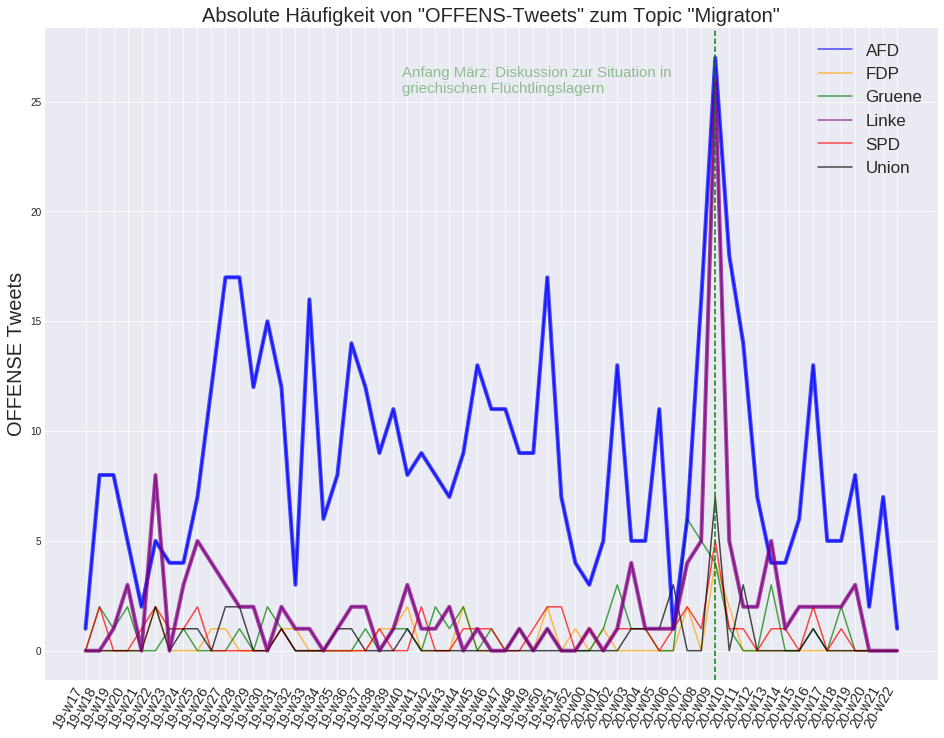

In [258]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

plt.style.use('seaborn-darkgrid')
my_palette = ['blue', 'orange', 'green', 'purple', 'red', 'black']

fig = plt.figure(figsize = (16, 12))
ax = fig.add_subplot(111)

num=0
for column in sent_Mig_piv:
    ax.plot(sent_Mig_piv.index, sent_Mig_piv[column], color = my_palette[num], alpha=0.7, label = column)
    num+=1

ax.plot(sent_Mig_piv.index, sent_Mig_piv['AFD'], marker='', color='blue', linewidth=4, alpha=0.7)
ax.plot(sent_Mig_piv.index, sent_Mig_piv['Linke'], marker='', color='purple', linewidth=4, alpha=0.7)

ax.set_title('Absolute Häufigkeit von "OFFENS-Tweets" zum Topic "Migration"', size = 20)
ylab = ax.set_ylabel('OFFENSE Tweets', size = 20)
# = ax.set_xlabel('Datum', size = 20)
plt.legend(loc = 1, ncol = 1, fontsize = 17)

#x_tags
x_tags = plt.xticks(sent_Mig_piv.index, fontsize = 14, rotation = 60, ha = "right")

ax.axvline('20-w09', ls='--', color='g')
ax.text(0.4, 0.9, 'Anfang März: Diskussion zur Situation in \ngriechischen Flüchtlingslagern', color='darkseagreen', fontsize=15, transform=ax.transAxes)


### Topic: Klima

In [117]:
sent_Klima = sent_df_Wien[sent_df_Wien['full_text_processed'].str.match(r'(.*Klima.*|.*Greta.*|.*Friday.*)(?i)')==True]

sent_Klima_piv = pd.pivot_table(sent_Klima, columns = ['user_party'], index = ['predict'], aggfunc = np.count_nonzero)
sent_Klima_piv['full_text_processed']

user_party  AFD   FDP  Gruene  Linke   SPD  Union
predict                                          
OFFENSE     278    52     103    102    45     26
OTHER       660  1427    2337   1133  1084    843

In [273]:
sent_Klima = sent_df_Wien[sent_df_Wien['full_text_processed'].str.match(r'(.*Klima.*|.*Greta.*|.*Friday.*)(?i)')==True]

sent_Klima_OF = sent_Klima.loc[
                            #(sent_Klima['date']>=datetime.date(2020,1,1))
                              (sent_Klima['predict'] == 'OFFENSE')
                             ]

sent_Klima_piv_OF = pd.pivot_table(sent_Klima_OF, columns = ['user_party'], index = ['week'], aggfunc = np.count_nonzero).fillna(0)
sent_Klima_piv_OF = sent_Klima_piv_OF['full_text']


sent_Klima_OT = sent_Klima.loc[
                            #(sent_Klima['date']>=datetime.date(2020,1,1))
                              (sent_Klima['predict'] == 'OTHER')
                             ]

sent_Klima_piv_OT = pd.pivot_table(sent_Klima_OT, columns = ['user_party'], index = ['week'], aggfunc = np.count_nonzero).fillna(0)
sent_Klima_piv_OT = sent_Klima_piv_OT['full_text']

Text(0.6, 0.5, '20.12.2019: Kompromiss \nzum Klimapaket')

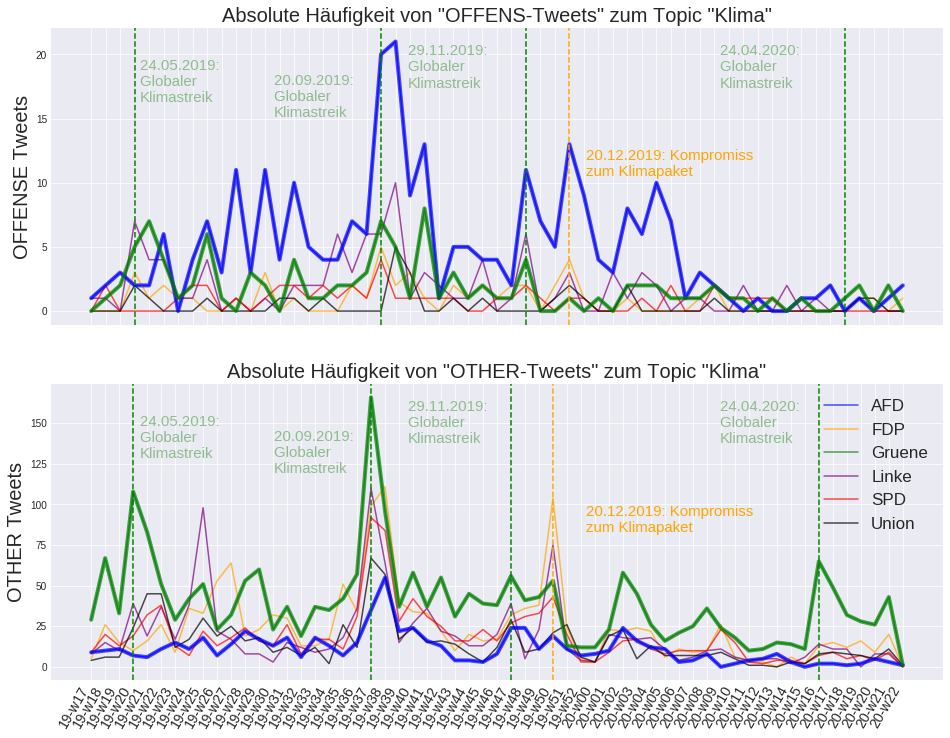

In [315]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

plt.style.use('seaborn-darkgrid')
my_palette = ['blue', 'orange', 'green', 'purple', 'red', 'black']
fig = plt.figure(figsize = (16, 12))


ax = fig.add_subplot(211)

num=0
for column in sent_Klima_piv_OF:
    ax.plot(sent_Klima_piv_OF.index, sent_Klima_piv_OF[column], color = my_palette[num], alpha=0.7, label = column)
    num+=1

ax.plot(sent_Klima_piv_OF.index, sent_Klima_piv_OF['AFD'], marker='', color='blue', linewidth=4, alpha=0.7)
ax.plot(sent_Klima_piv_OF.index, sent_Klima_piv_OF['Gruene'], marker='', color='green', linewidth=4, alpha=0.7)
# ax.plot(sent_Klima_piv.index, sent_Klima_piv['Linke'], marker='', color='purple', linewidth=4, alpha=0.7)

ax.set_title('Absolute Häufigkeit von "OFFENS-Tweets" zum Topic "Klima"', size = 20)
ylab = ax.set_ylabel('OFFENSE Tweets', size = 20)

#x_tags
plt.setp(ax.get_xticklabels(), visible=False)
ax.axvline('19-w20', ls='--', color='g')
ax.text(0.1, 0.75, '24.05.2019: \nGlobaler \nKlimastreik', color='darkseagreen', fontsize=15, transform=ax.transAxes)
ax.axvline('19-w37', ls='--', color='g')
ax.text(0.25, 0.7, '20.09.2019: \nGlobaler \nKlimastreik', color='darkseagreen', fontsize=15, transform=ax.transAxes)
ax.axvline('19-w47', ls='--', color='g')
ax.text(0.4, 0.8, '29.11.2019: \nGlobaler \nKlimastreik', color='darkseagreen', fontsize=15, transform=ax.transAxes)
ax.axvline('20-w16', ls='--', color='g')
ax.text(0.75, 0.8, '24.04.2020: \nGlobaler \nKlimastreik', color='darkseagreen', fontsize=15, transform=ax.transAxes)
ax.axvline('19-w50', ls='--', color='orange')
ax.text(0.6, 0.5, '20.12.2019: Kompromiss \nzum Klimapaket', color='orange', fontsize=15, transform=ax.transAxes)


ax = fig.add_subplot(212)

num=0
for column in sent_Klima_piv_OT:
    ax.plot(sent_Klima_piv_OT.index, sent_Klima_piv_OT[column], color = my_palette[num], alpha=0.7, label = column)
    num+=1

ax.plot(sent_Klima_piv_OT.index, sent_Klima_piv_OT['AFD'], marker='', color='blue', linewidth=4, alpha=0.7)
ax.plot(sent_Klima_piv_OT.index, sent_Klima_piv_OT['Gruene'], marker='', color='green', linewidth=4, alpha=0.7)

ax.set_title('Absolute Häufigkeit von "OTHER-Tweets" zum Topic "Klima"', size = 20)
ylab = ax.set_ylabel('OTHER Tweets', size = 20)
plt.legend(loc = 1, ncol = 1, fontsize = 17)

#x_tags
x_tags = plt.xticks(sent_Klima_piv_OT.index, fontsize = 14, rotation = 60, ha = 'right')



ax.axvline('19-w20', ls='--', color='g')
ax.text(0.1, 0.75, '24.05.2019: \nGlobaler \nKlimastreik', color='darkseagreen', fontsize=15, transform=ax.transAxes)
ax.axvline('19-w37', ls='--', color='g')
ax.text(0.25, 0.7, '20.09.2019: \nGlobaler \nKlimastreik', color='darkseagreen', fontsize=15, transform=ax.transAxes)
ax.axvline('19-w47', ls='--', color='g')
ax.text(0.4, 0.8, '29.11.2019: \nGlobaler \nKlimastreik', color='darkseagreen', fontsize=15, transform=ax.transAxes)
ax.axvline('20-w16', ls='--', color='g')
ax.text(0.75, 0.8, '24.04.2020: \nGlobaler \nKlimastreik', color='darkseagreen', fontsize=15, transform=ax.transAxes)
ax.axvline('19-w50', ls='--', color='orange')
ax.text(0.6, 0.5, '20.12.2019: Kompromiss \nzum Klimapaket', color='orange', fontsize=15, transform=ax.transAxes)


### Topic: Öffentlich-rechtlicher Rundfunk

In [307]:
sent_GEZ = sent_df_Wien[sent_df_Wien['full_text_processed'].str.match(r'(.*ARD.*|.*ZDF.*|.*WDR.*|.*GEZ.*|.*ÖRR.*|.*Rundfunk.*|.*Staatsfunk.*)(?i)')==True]

sent_GEZ_piv = pd.pivot_table(sent_GEZ, columns = ['user_party'], index = ['predict'], aggfunc = np.count_nonzero)
sent_GEZ_piv['full_text_processed']

user_party  AFD   FDP  Gruene  Linke   SPD  Union
predict                                          
OFFENSE     599    79      93    123    66     66
OTHER       889  1525    1781   1218  1339   1186

In [312]:
sent_GEZ = sent_df_Wien[sent_df_Wien['full_text_processed'].str.match(r'(.*ARD.*|.*ZDF.*|.*WDR.*|.*GEZ.*|.*ÖRR.*|.*Rundfunk.*|.*Staatsfunk.*)(?i)')==True]

sent_GEZ_OF = sent_GEZ.loc[
                            #(sent_GEZ['date']>=datetime.date(2020,1,1))
                              (sent_GEZ['predict'] == 'OFFENSE')
                             ]

sent_GEZ_piv_OF = pd.pivot_table(sent_GEZ_OF, columns = ['user_party'], index = ['week'], aggfunc = np.count_nonzero).fillna(0)
sent_GEZ_piv_OF = sent_GEZ_piv_OF['full_text']


sent_GEZ_OT = sent_GEZ.loc[
                            #(sent_GEZ['date']>=datetime.date(2020,1,1))
                              (sent_GEZ['predict'] == 'OTHER')
                             ]

sent_GEZ_piv_OT = pd.pivot_table(sent_GEZ_OT, columns = ['user_party'], index = ['week'], aggfunc = np.count_nonzero).fillna(0)
sent_GEZ_piv_OT = sent_GEZ_piv_OT['full_text']

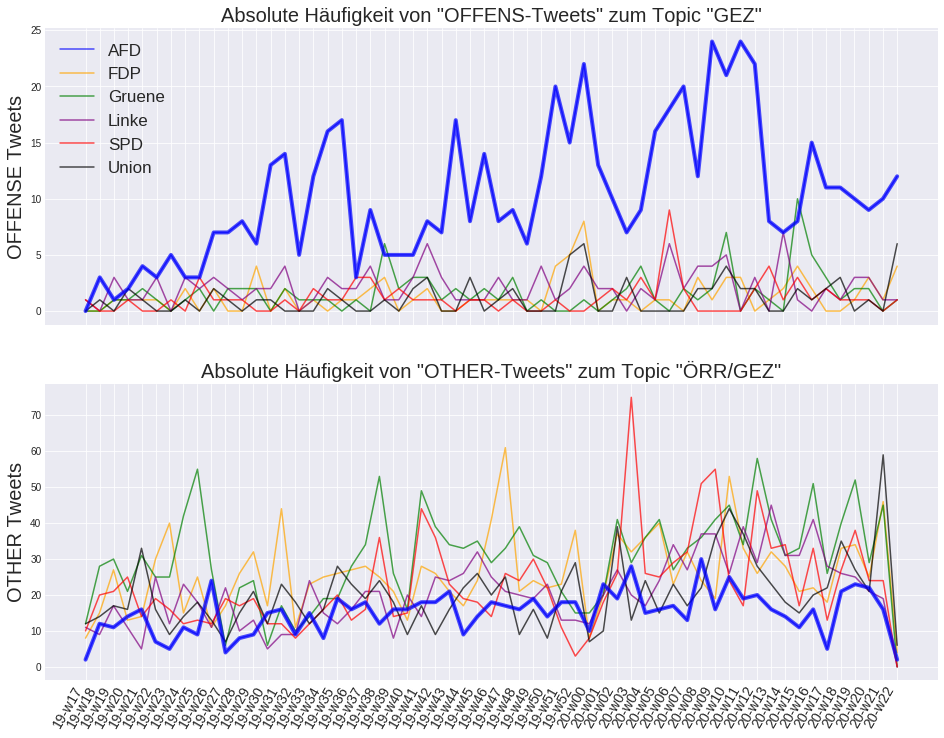

In [322]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

plt.style.use('seaborn-darkgrid')
my_palette = ['blue', 'orange', 'green', 'purple', 'red', 'black']
fig = plt.figure(figsize = (16, 12))


ax = fig.add_subplot(211)

num=0
for column in sent_GEZ_piv_OF:
    ax.plot(sent_GEZ_piv_OF.index, sent_GEZ_piv_OF[column], color = my_palette[num], alpha=0.7, label = column)
    num+=1

ax.plot(sent_GEZ_piv_OF.index, sent_GEZ_piv_OF['AFD'], marker='', color='blue', linewidth=4, alpha=0.7)



ax.set_title('Absolute Häufigkeit von "OFFENS-Tweets" zum Topic "GEZ"', size = 20)
ylab = ax.set_ylabel('OFFENSE Tweets', size = 20)
plt.legend(loc = 2, ncol = 1, fontsize = 17)

#x_tags
plt.setp(ax.get_xticklabels(), visible=False)

ax = fig.add_subplot(212)

num=0
for column in sent_GEZ_piv_OT:
    ax.plot(sent_GEZ_piv_OT.index, sent_GEZ_piv_OT[column], color = my_palette[num], alpha=0.7, label = column)
    num+=1

ax.plot(sent_GEZ_piv_OT.index, sent_GEZ_piv_OT['AFD'], marker='', color='blue', linewidth=4, alpha=0.7)

ax.set_title('Absolute Häufigkeit von "OTHER-Tweets" zum Topic "ÖRR/GEZ"', size = 20)
ylab = ax.set_ylabel('OTHER Tweets', size = 20)

#x_tags
x_tags = plt.xticks(sent_GEZ_piv_OT.index, fontsize = 14, rotation = 60, ha = 'right')

### Topic: Corona

In [344]:
sent_Corona = sent_df_Wien[sent_df_Wien['full_text_processed'].str.match(r'(.*Corona.*|.*Covid.*|.*Sars.*)(?i)')==True]

sent_Corona_piv = pd.pivot_table(sent_Corona, columns = ['user_party'], index = ['predict'], aggfunc = np.count_nonzero)
sent_Corona_piv['full_text_processed']

user_party   AFD   FDP  Gruene  Linke   SPD  Union
predict                                           
OFFENSE      211    64      76    120    58     53
OTHER       1099  2047    2178   1855  1599   1656

In [342]:
sent_Corona = sent_df_Wien[sent_df_Wien['full_text_processed'].str.match(r'(.*Corona.*|.*Covid.*|.*Sars.*)(?i)')==True]

sent_Corona_OF = sent_Corona.loc[
                            #(sent_Corona['date']>=datetime.date(2020,1,1))
                              (sent_Corona['predict'] == 'OFFENSE')
                             ]

sent_Corona_piv_OF = pd.pivot_table(sent_Corona_OF, columns = ['user_party'], index = ['week'], aggfunc = np.count_nonzero).fillna(0)
sent_Corona_piv_OF = sent_Corona_piv_OF['full_text']


sent_Corona_OT = sent_Corona.loc[
                            #(sent_Corona['date']>=datetime.date(2020,1,1))
                              (sent_Corona['predict'] == 'OTHER')
                             ]

sent_Corona_piv_OT = pd.pivot_table(sent_Corona_OT, columns = ['user_party'], index = ['week'], aggfunc = np.count_nonzero).fillna(0)
sent_Corona_piv_OT = sent_Corona_piv_OT['full_text']

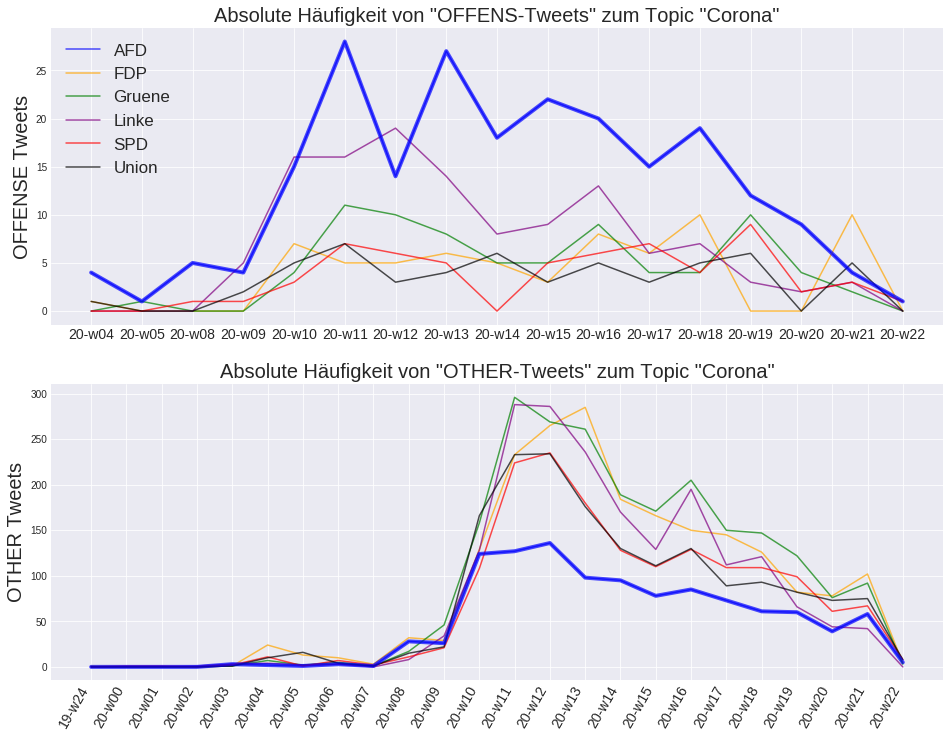

In [334]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

plt.style.use('seaborn-darkgrid')
my_palette = ['blue', 'orange', 'green', 'purple', 'red', 'black']
fig = plt.figure(figsize = (16, 12))


ax = fig.add_subplot(211)

num=0
for column in sent_Corona_piv_OF:
    ax.plot(sent_Corona_piv_OF.index, sent_Corona_piv_OF[column], color = my_palette[num], alpha=0.7, label = column)
    num+=1

ax.plot(sent_Corona_piv_OF.index, sent_Corona_piv_OF['AFD'], marker='', color='blue', linewidth=4, alpha=0.7)
x_tags = plt.xticks(sent_Corona_piv_OF.index, fontsize = 14)


ax.set_title('Absolute Häufigkeit von "OFFENS-Tweets" zum Topic "Corona"', size = 20)
ylab = ax.set_ylabel('OFFENSE Tweets', size = 20)
plt.legend(loc = 2, ncol = 1, fontsize = 17)


ax = fig.add_subplot(212)

num=0
for column in sent_Corona_piv_OT:
    ax.plot(sent_Corona_piv_OT.index, sent_Corona_piv_OT[column], color = my_palette[num], alpha=0.7, label = column)
    num+=1

ax.plot(sent_Corona_piv_OT.index, sent_Corona_piv_OT['AFD'], marker='', color='blue', linewidth=4, alpha=0.7)

ax.set_title('Absolute Häufigkeit von "OTHER-Tweets" zum Topic "Corona"', size = 20)
ylab = ax.set_ylabel('OTHER Tweets', size = 20)

#x_tags
x_tags = plt.xticks(sent_Corona_piv_OT.index, fontsize = 14, rotation = 60, ha = 'right')

### Topic: Verschwörungstheorien und Fake News

In [372]:
sent_ALU = sent_df_Wien[sent_df_Wien['full_text_processed'].str.match(r'(.*Verschwö.*|.*Aluhut.*|.*Hildmann.*|.*Impfpflicht.*|.*Widerstand2020.*|.*Hygienedemos.*|.*Fake News*|.*FakeNews.*)(?i)')==True]

sent_ALU_piv = pd.pivot_table(sent_ALU, columns = ['user_party'], index = ['predict'], aggfunc = np.count_nonzero)
sent_ALU_piv['full_text_processed']
sent_ALU

_id                      created_at  \
144    5e954e7b7973ce357348850b  Fri May 17 15:30:19 +0000 2019   
544    5e95516fba7e7d98e199e9f7  Thu May 09 21:09:34 +0000 2019   
685    5e955292ba7e7d98e19a6de3  Tue May 14 12:17:12 +0000 2019   
1033   5e9554b521dec1d53688bd40  Sun May 05 17:15:44 +0000 2019   
1297   5e95565121dec1d53689af5c  Mon May 06 07:12:42 +0000 2019   
1361   5e9556d621dec1d53689f8d5  Wed May 15 08:46:19 +0000 2019   
1736   5e958d5e15abae9d9d4cad53  Wed May 22 15:46:11 +0000 2019   
1744   5e958d5e15abae9d9d4cad72  Sat May 18 09:25:00 +0000 2019   
1770   5e958d5e15abae9d9d4cad94  Mon May 13 06:37:03 +0000 2019   
1806   5e958d5e15abae9d9d4cadbd  Sun May 05 17:27:30 +0000 2019   
1983   5e958ea115abae9d9d4d3799  Wed May 22 08:59:39 +0000 2019   
2058   5e958ed415abae9d9d4d631b  Thu May 23 07:36:30 +0000 2019   
2118   5e958ed415abae9d9d4d637d  Thu May 09 08:46:27 +0000 2019   
2119   5e958ed415abae9d9d4d637e  Thu May 09 08:44:23 +0000 2019   
2241   5e958eff15abae9d9d4d8295  Fri May 03 11:05:00 +0000 2019   
2462   5e958f8415abae9d9d4e0181  Mon May 06 12:51:54 +0000 2019   
2795   5e95928636c17d9b398f94d4  Mon May 06 06:45:18 +0000 2019   
2960   5e959bc636c17d9b3990545c  Sat May 18 16:43:28 +0000 2019   
3280   5e95a0fadc45db2183f9e677  Sat May 11 10:19:12 +0000 2019   
3421   5e95a196dc45db2183fa6b1f  Thu May 23 08:59:24 +0000 2019   
3424   5e95a196dc45db2183fa6b25  Wed May 22 10:30:35 +0000 2019   
3425   5e95a196dc45db2183fa6b2a  Mon May 20 23:41:11 +0000 2019   
3556   5e95a22cdc45db2183fad670  Tue May 14 15:52:15 +0000 2019   
3743   5e95a2f3dc45db2183fb76e6  Thu May 23 19:45:02 +0000 2019   
3845   5e95a353dc45db2183fbb89d  Wed May 15 11:25:41 +0000 2019   
3849   5e95a353dc45db2183fbb8ab  Sun May 05 09:22:43 +0000 2019   
3865   5e95a361dc45db2183fbc967  Sun May 05 09:00:39 +0000 2019   
3925   5e95a493dc45db2183fc2a9c  Fri May 10 07:07:29 +0000 2019   
4449   5eb6dfa4258b117affd01cce  Mon May 27 20:16:20 +0000 2019   
4459   5eb6dfa4258b117affd01d1e  Tue May 21 21:54:31 +0000 2019   
4572   5eb6e0b3258b117affd0ac21  Thu May 09 22:11:25 +0000 2019   
4576   5eb6e0b6258b117affd0b4dd  Fri May 03 16:59:56 +0000 2019   
5113   5eb716a31a6fb4370c595290  Mon May 06 06:51:54 +0000 2019   
5114   5eb716a31a6fb4370c595291  Sun May 05 14:52:16 +0000 2019   
5169   5eb717241a6fb4370c598c22  Thu May 09 08:04:36 +0000 2019   
5541   5eb77f664f4fda7c5d625f3c  Sun May 19 20:11:15 +0000 2019   
5588   5eb77f8b4f4fda7c5d627c6f  Wed May 08 06:37:49 +0000 2019   
5602   5eb77f8b4f4fda7c5d627c7a  Mon May 06 08:49:15 +0000 2019   
5791   5eb782481a6fb4370c5a0aee  Fri May 17 12:13:06 +0000 2019   
6107   5eb786cf1200de25417fb046  Sun May 12 20:46:26 +0000 2019   
6460   5eb789054599d387474be411  Tue May 14 14:07:05 +0000 2019   
6477   5eb789b54599d387474c1496  Thu May 23 09:41:51 +0000 2019   
6562   5eb78ac24599d387474c6f8e  Sat May 11 07:28:26 +0000 2019   
6563   5eb78ac24599d387474c6f97  Sun May 05 16:02:09 +0000 2019   
6636   5eb78af74599d387474c835b  Wed May 08 07:53:34 +0000 2019   
6747   5eb790392c0dd47b69079cfe  Wed May 08 21:01:52 +0000 2019   
7114   5eb7938a2c0dd47b6908b325  Thu May 02 13:36:30 +0000 2019   
7126   5eb794142c0dd47b6908d5a2  Wed May 08 14:20:21 +0000 2019   
8269   5ed76246ef262378466c4a05  Mon May 06 13:24:36 +0000 2019   
8784   5ed7663cef262378466dd2d0  Tue May 28 11:13:56 +0000 2019   
8785   5ed7663cef262378466dd2d1  Tue May 28 10:01:37 +0000 2019   
8945   5ed7686ba196a3b4575b25c6  Wed May 08 07:14:42 +0000 2019   
9065   5ed7695cdd27a997c2694088  Tue May 21 15:05:37 +0000 2019   
9069   5ed7695cdd27a997c2694090  Wed May 15 13:50:20 +0000 2019   
9074   5ed7695cdd27a997c26940a4  Tue May 07 07:08:51 +0000 2019   
9097   5ed7698ddd27a997c26955fc  Wed May 22 13:34:45 +0000 2019   
9454   5ed76b8fdd27a997c269b5be  Mon May 20 08:57:45 +0000 2019   
9464   5ed76b8fdd27a997c269b5da  Wed May 15 17:35:05 +0000 2019   
9476   5ed76b8fdd27a997c269b5f5  Wed May 08 11:09:21 +0000 2019   
9532   5

In [379]:
sent_ALU = sent_df_Wien[sent_df_Wien['full_text_processed'].str.match(r'(.*Verschwö.*|.*Aluhut.*|.*Hildmann.*|.*Impfpflicht.*|.*Widerstand2020.*|.*Hygienedemos.*|.*Fake News*|.*FakeNews.*)(?i)')==True]

sent_ALU_OF = sent_ALU.loc[
                            #(sent_ALU['date']>=datetime.date(2020,1,1))
                              (sent_ALU['predict'] == 'OFFENSE')
                             ]

sent_ALU_piv_OF = pd.pivot_table(sent_ALU_OF, columns = ['user_party'], index = ['month'], aggfunc = np.count_nonzero).fillna(0)
sent_ALU_piv_OF = sent_ALU_piv_OF['full_text']


sent_ALU_OT = sent_ALU.loc[
                            #(sent_ALU['date']>=datetime.date(2020,1,1))
                              (sent_ALU['predict'] == 'OTHER')
                             ]

sent_ALU_piv_OT = pd.pivot_table(sent_ALU_OT, columns = ['user_party'], index = ['month'], aggfunc = np.count_nonzero).fillna(0)
sent_ALU_piv_OT = sent_ALU_piv_OT['full_text']

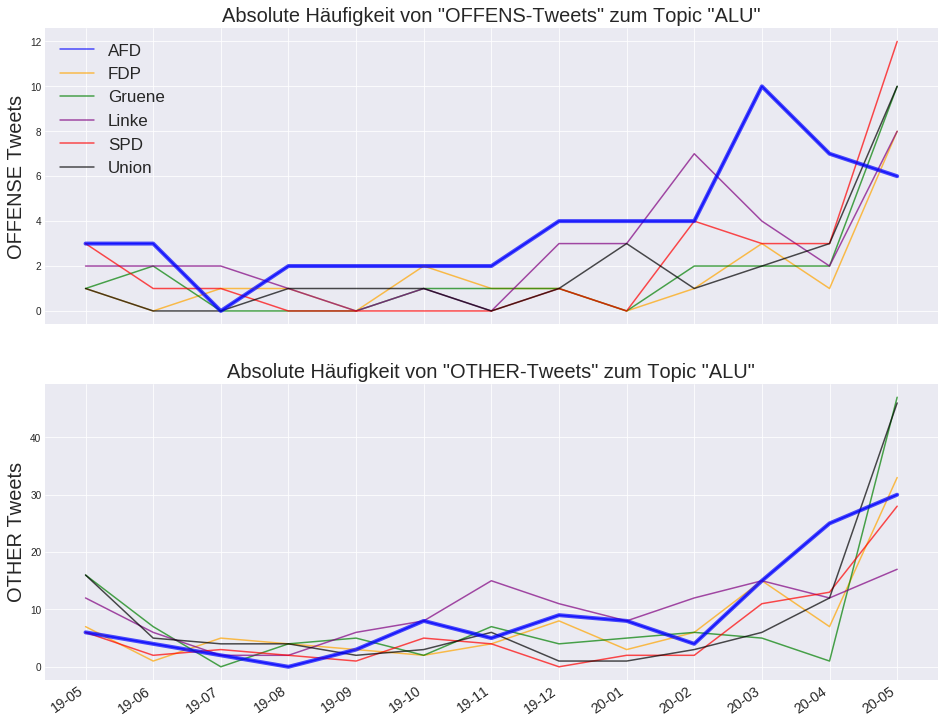

In [383]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

plt.style.use('seaborn-darkgrid')
my_palette = ['blue', 'orange', 'green', 'purple', 'red', 'black']
fig = plt.figure(figsize = (16, 12))


ax = fig.add_subplot(211)

num=0
for column in sent_ALU_piv_OF:
    ax.plot(sent_ALU_piv_OF.index, sent_ALU_piv_OF[column], color = my_palette[num], alpha=0.7, label = column)
    num+=1

ax.plot(sent_ALU_piv_OF.index, sent_ALU_piv_OF['AFD'], marker='', color='blue', linewidth=4, alpha=0.7)
#x_tags = plt.xticks(sent_ALU_piv_OF.index, fontsize = 12, rotation = 35, ha = 'right')
plt.setp(ax.get_xticklabels(), visible=False)


ax.set_title('Absolute Häufigkeit von "OFFENS-Tweets" zum Topic "ALU"', size = 20)
ylab = ax.set_ylabel('OFFENSE Tweets', size = 20)
plt.legend(loc = 2, ncol = 1, fontsize = 17)


ax = fig.add_subplot(212)

num=0
for column in sent_ALU_piv_OT:
    ax.plot(sent_ALU_piv_OT.index, sent_ALU_piv_OT[column], color = my_palette[num], alpha=0.7, label = column)
    num+=1

ax.plot(sent_ALU_piv_OT.index, sent_ALU_piv_OT['AFD'], marker='', color='blue', linewidth=4, alpha=0.7)

ax.set_title('Absolute Häufigkeit von "OTHER-Tweets" zum Topic "ALU"', size = 20)
ylab = ax.set_ylabel('OTHER Tweets', size = 20)

#x_tags
x_tags = plt.xticks(sent_ALU_piv_OT.index, fontsize = 14, rotation = 35, ha = 'right')

### Topic: Links- und Rechtsextremismus

In [400]:

sent_LiEx = sent_df_Wien[sent_df_Wien['full_text_processed'].str.match(r'(.*Linksextrem.*)(?i)')==True]

sent_LiEx_OF = sent_LiEx.loc[
                            #(sent_LiEx['date']>=datetime.date(2020,1,1))
                              (sent_LiEx['predict'] == 'OFFENSE')
                             ]

sent_LiEx_piv_OF = pd.pivot_table(sent_LiEx_OF, columns = ['user_party'], index = ['month'], aggfunc = np.count_nonzero).fillna(0)
sent_LiEx_piv_OF = sent_LiEx_piv_OF['full_text']


sent_LiEx_OT = sent_LiEx.loc[
                            #(sent_LiEx['date']>=datetime.date(2020,1,1))
                              (sent_LiEx['predict'] == 'OTHER')
                             ]

sent_LiEx_piv_OT = pd.pivot_table(sent_LiEx_OT, columns = ['user_party'], index = ['month'], aggfunc = np.count_nonzero).fillna(0)
sent_LiEx_piv_OT = sent_LiEx_piv_OT['full_text']


In [399]:
sent_ReEx = sent_df_Wien[sent_df_Wien['full_text_processed'].str.match(r'(.*Rechtsextrem.*)(?i)')==True]

sent_ReEx_OF = sent_ReEx.loc[
                            #(sent_ReEx['date']>=datetime.date(2020,1,1))
                              (sent_ReEx['predict'] == 'OFFENSE')
                             ]

sent_ReEx_piv_OF = pd.pivot_table(sent_ReEx_OF, columns = ['user_party'], index = ['month'], aggfunc = np.count_nonzero).fillna(0)
sent_ReEx_piv_OF = sent_ReEx_piv_OF['full_text']

sent_ReEx_OT = sent_ReEx.loc[
                            #(sent_ReEx['date']>=datetime.date(2020,1,1))
                              (sent_ReEx['predict'] == 'OTHER')
                             ]

sent_ReEx_piv_OT = pd.pivot_table(sent_ReEx_OT, columns = ['user_party'], index = ['month'], aggfunc = np.count_nonzero).fillna(0)
sent_ReEx_piv_OT = sent_ReEx_piv_OT['full_text']

Text(0.8, 0.8, '19.02.2020: \nAnschlag \nHanau')

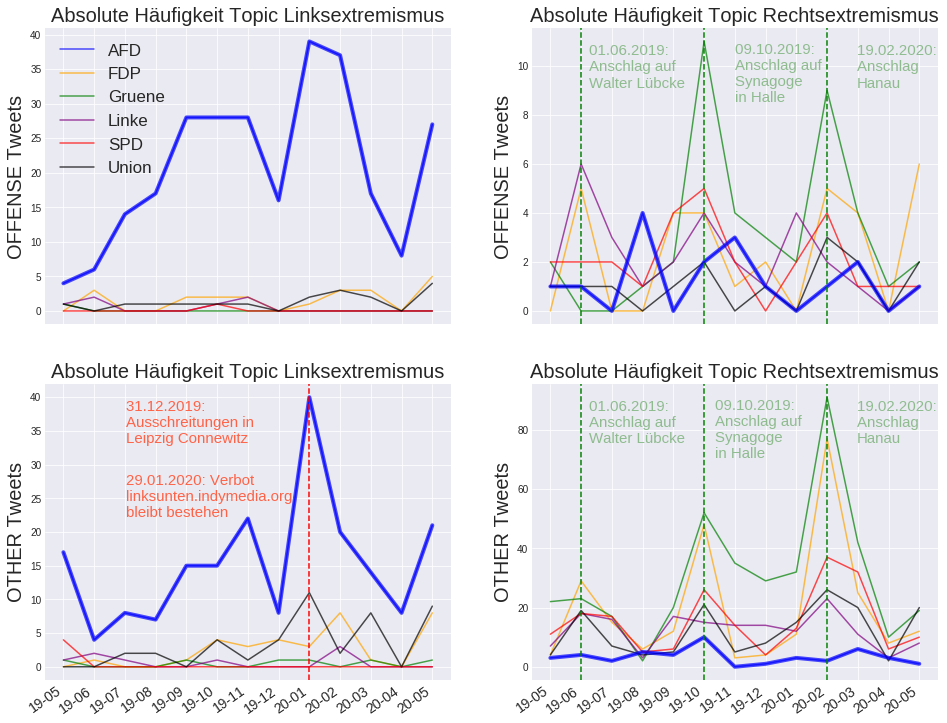

In [428]:

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

plt.style.use('seaborn-darkgrid')
my_palette = ['blue', 'orange', 'green', 'purple', 'red', 'black']
fig = plt.figure(figsize = (16, 12))

#######

ax = fig.add_subplot(221)

num=0
for column in sent_LiEx_piv_OF:
    ax.plot(sent_LiEx_piv_OF.index, sent_LiEx_piv_OF[column], color = my_palette[num], alpha=0.7, label = column)
    num+=1

ax.plot(sent_LiEx_piv_OF.index, sent_LiEx_piv_OF['AFD'], marker='', color='blue', linewidth=4, alpha=0.7)
#x_tags = plt.xticks(sent_LiEx_piv_OF.index, fontsize = 12, rotation = 35, ha = 'right')
plt.setp(ax.get_xticklabels(), visible=False)


ax.set_title('Absolute Häufigkeit Topic Linksextremismus', size = 20)
ylab = ax.set_ylabel('OFFENSE Tweets', size = 20)
plt.legend(loc = 2, ncol = 1, fontsize = 17)


ax = fig.add_subplot(223)

num=0
for column in sent_LiEx_piv_OT:
    ax.plot(sent_LiEx_piv_OT.index, sent_LiEx_piv_OT[column], color = my_palette[num], alpha=0.7, label = column)
    num+=1

ax.plot(sent_LiEx_piv_OT.index, sent_LiEx_piv_OT['AFD'], marker='', color='blue', linewidth=4, alpha=0.7)

ax.set_title('Absolute Häufigkeit Topic Linksextremismus', size = 20)
ylab = ax.set_ylabel('OTHER Tweets', size = 20)

#x_tags
x_tags = plt.xticks(sent_LiEx_piv_OT.index, fontsize = 14, rotation = 35, ha = 'right')

ax.axvline('20-01', ls='--', color='r')
ax.text(0.2, 0.8, '31.12.2019: \nAusschreitungen in \nLeipzig Connewitz', color='tomato', fontsize=15, transform=ax.transAxes)
ax.text(0.2, 0.55, '29.01.2020: Verbot \nlinksunten.indymedia.org \nbleibt bestehen', color='tomato', fontsize=15, transform=ax.transAxes)


######


ax = fig.add_subplot(222)

num=0
for column in sent_ReEx_piv_OF:
    ax.plot(sent_ReEx_piv_OF.index, sent_ReEx_piv_OF[column], color = my_palette[num], alpha=0.7, label = column)
    num+=1

ax.plot(sent_ReEx_piv_OF.index, sent_ReEx_piv_OF['AFD'], marker='', color='blue', linewidth=4, alpha=0.7)
#x_tags = plt.xticks(sent_ReEx_piv_OF.index, fontsize = 12, rotation = 35, ha = 'right')
plt.setp(ax.get_xticklabels(), visible=False)


ax.set_title('Absolute Häufigkeit Topic Rechtsextremismus', size = 20)
ylab = ax.set_ylabel('OFFENSE Tweets', size = 20)
ax.axvline('19-10', ls='--', color='g')
ax.text(0.5, 0.75, '09.10.2019: \nAnschlag auf \nSynagoge \nin Halle', color='darkseagreen', fontsize=15, transform=ax.transAxes)
ax.axvline('19-06', ls='--', color='g')
ax.text(0.14, 0.8, '01.06.2019: \nAnschlag auf \nWalter Lübcke', color='darkseagreen', fontsize=15, transform=ax.transAxes)
ax.axvline('20-02', ls='--', color='g')
ax.text(0.8, 0.8, '19.02.2020: \nAnschlag \nHanau', color='darkseagreen', fontsize=15, transform=ax.transAxes)



ax = fig.add_subplot(224)

num=0
for column in sent_ReEx_piv_OT:
    ax.plot(sent_ReEx_piv_OT.index, sent_ReEx_piv_OT[column], color = my_palette[num], alpha=0.7, label = column)
    num+=1

ax.plot(sent_ReEx_piv_OT.index, sent_ReEx_piv_OT['AFD'], marker='', color='blue', linewidth=4, alpha=0.7)

ax.set_title('Absolute Häufigkeit Topic Rechtsextremismus', size = 20)
ylab = ax.set_ylabel('OTHER Tweets', size = 20)

#x_tags
x_tags = plt.xticks(sent_ReEx_piv_OT.index, fontsize = 14, rotation = 35, ha = 'right')

ax.axvline('19-10', ls='--', color='g')
ax.text(0.45, 0.75, '09.10.2019: \nAnschlag auf \nSynagoge \nin Halle', color='darkseagreen', fontsize=15, transform=ax.transAxes)
ax.axvline('19-06', ls='--', color='g')
ax.text(0.14, 0.8, '01.06.2019: \nAnschlag auf \nWalter Lübcke', color='darkseagreen', fontsize=15, transform=ax.transAxes)
ax.axvline('20-02', ls='--', color='g')
ax.text(0.8, 0.8, '19.02.2020: \nAnschlag \nHanau', color='darkseagreen', fontsize=15, transform=ax.transAxes)




### Topic: Black Lives Matter

In [394]:
sent_BLM = sent_df_Wien[sent_df_Wien['full_text_processed'].str.match(r'(.*Minneapolis.*|.*BLM.*|.*George Floyd.*|.*Black_Lives.*)(?i)')==True]

sent_BLM_piv = pd.pivot_table(sent_BLM, columns = ['user_party'], index = ['predict'], aggfunc = np.count_nonzero)
sent_BLM_piv['full_text_processed']
sent_BLM

_id                      created_at  \
7215   5ed76b56a196a3b4575be948  Sun Mar 01 15:45:05 +0000 2020   
2631   5ed75887199f855a7da861fb  Sun May 31 21:28:49 +0000 2020   
2741   5ed75906199f855a7da89f42  Sun May 31 23:14:51 +0000 2020   
3640   5ed75c78ef262378466b35e5  Fri May 29 10:30:21 +0000 2020   
3820   5ed760c9ef262378466bb29c  Sun May 31 13:51:32 +0000 2020   
4282   5ed76189ef262378466c0a27  Fri May 29 12:08:55 +0000 2020   
5633   5ed767e1a196a3b4575ad609  Sun May 31 15:30:34 +0000 2020   
6190   5ed7690ba196a3b4575b6e28  Wed May 27 14:01:40 +0000 2020   
8289   5ed76cabdd27a997c26a116f  Fri May 29 11:01:18 +0000 2020   
8528   5ed76d17dd27a997c26a305a  Sat May 30 11:00:54 +0000 2020   
9488   5ed76f93c8a60fb794f19492  Sun May 31 19:27:07 +0000 2020   
9663   5ed77014c8a60fb794f1bd34  Sun May 31 19:51:58 +0000 2020   
9664   5ed77014c8a60fb794f1bd35  Sun May 31 14:29:21 +0000 2020   
11120  5ed77202c8a60fb794f2836d  Sat May 30 14:27:52 +0000 2020   
13602  5ed775037a23e3b2cd6192e9  Wed May 27 14:11:41 +0000 2020   
13707  5ed775447a23e3b2cd61a81a  Wed May 27 10:41:35 +0000 2020   
15397  5ed7779d7a23e3b2cd628816  Thu May 28 17:51:42 +0000 2020   

                        id  \
7215   1234142623511851008   
2631   1267206424700039168   
2741   1267233105594761217   
3640   1266315940792320000   
3820   1267091344326971400   
4282   1266340745214124037   
5633   1267116264687669249   
6190   1265644341650997248   
8289   1266323727031119873   
8528   1266686013113618433   
9488   1267175794461327360   
9663   1267182052014727169   
9664   1267100859315490822   
11120  1266738099276656640   
13602  1265646863304339461   
13707  1265593988117155840   
15397  1266064622156746758   

                                                                                                                                                                                                                                                                                                               full_text  \
7215                                                                                                                             @PoLILYtik @TSchwarwel @betti_gaenseblm @LichtfestLE @Burkhard_Jung Soviel Respektlosigkeit in einem Tweet. Echt krass. Und du fühlst dich damit auch noch im Recht...sorry: unwählbar!   
2631                                                                                                                         George Floyd - einer, der ihn gut kannte, nannte den engagierten Christen eine „person of peace“! Rest in peace, brother!  And may peace unite the divided states! https://t.co/zRwn8un1sA?   
2741                                                                             FIGHT DISCRIMINATION\n\n... würde ich mir als Tweet von @realDonaldTrump auch mal wünschen. \n\n#fightdiscrimination #Trump #BlackLivesMatters #BLACK_LIVES_MATTER #USAonFire #GeorgeFloydProtests #GeorgeFloyd https://t.co/CRWWMeTOxM   
3640                             Ausnahmezustand in #Minneapolis: Schwere Ausschreitungen am dritten Tag in Folge - es geht um den Tod von #GeorgeFloyd nach einem gewalttätigen Polizeieinsatz. Hoffentlich beruhigt sich die Lage. Es ist jetzt alles zu tun, um die Tat aufzuklären. #USA \n\nhttps://t.co/2zFGyOkx50   
3820                                                                                                                                                             So ist es. Diskriminierung beenden! #BlackLivesMatter \n\n#BLACK_LIVES_MATTER #AllLivesMatter #GeorgeFloyd #GeorgeFloydProtests https://t.co/AvR96KyNmL   
4282                             Mit großer Besorgnis schaue ich nach #Minneapolis. Ein Präsident, der gewaltverherrlichende Tweets absetzt und ein wütender Mob, der - nach verständlichem Protest - Straßen verwüstet. Die #USA entwickeln sich immer mehr zu einem gesellschaftlichen Pulverfass. #GeorgeFloydprotest   
5633     A @DeutscheWelle reporter and his camera operator have been

### Topic: Antifa

In [140]:
sent_Antifa = sent_df_Wien[sent_df_Wien['full_text_processed'].str.match(r'(.*Antifa.*|.*gegen Faschismus.*)(?i)')==True]

sent_Antifa_piv = pd.pivot_table(sent_Antifa, columns = ['user_party'], index = ['predict'], aggfunc = np.count_nonzero)
sent_Antifa_piv['full_text_processed']
#sent_Antifa

user_party  AFD  FDP  Gruene  Linke  SPD  Union
predict                                        
OFFENSE     223   11      21     91    3     18
OTHER        78   13      40    180   21      9

# Detail Suchen im Datensatz

In [ ]:
pd.set_option('display.max_colwidth', None)
sent_df_Wien.loc[(sent_df_Wien['date'] == datetime.date(2020,1,27)) 
                 & (sent_df_Wien['user_party'] == 'Union')
                 & (sent_df_Wien['predict'] == 'OFFENSE')
                ]['full_text']

In [ ]:
# pd.set_option('display.max_rows', 0)
pd.set_option('display.max_rows', 500)

#mdp_partei = sample_df[['user_party', 'week', 'user_screen_name', 'predict']]
# mdp_partei = mdp_partei[mdp_partei['predict'] == 'OFFENSE']
partei_piv_name = pd.pivot_table(mdp_partei, columns = ['predict'], index = ['user_party','user_screen_name'], aggfunc = np.count_nonzero)
partei_piv_name

In [392]:
pd.set_option('display.max_colwidth', None)
import datetime
# sent_df_Wien[sent_df_Wien['user_screen_name'] == 'StBrandner']
sent_df_Wien.loc[(
#         sent_df_Wien['date'] >= datetime.date(2020,1,26))
#                  & (sent_df_Wien['date'] <= datetime.date(2020,2,1))
#                  & (sent_df_Wien['user_party'] == 'AFD')
#                  & (sent_df_Wien['predict'] == 'OFFENSE')
                  (sent_df_Wien['user_screen_name'] == 'RonjaKemmer'))
        ]
# sent_df_Wien.loc[(sent_df_Wien['week'] == '20-w22') 
#                  & (sent_df_Wien['user_party'] == 'Gruene')
#                  & (sent_df_Wien['predict'] == 'OFFENSE')
#                 ].tail(200)

_id                      created_at  \
7814   5ed759bb199f855a7da9040b  Fri May 10 19:45:37 +0000 2019   
8213   5ed76196ef262378466c1745  Sat May 25 17:36:43 +0000 2019   
8214   5ed76196ef262378466c1748  Thu May 16 17:51:10 +0000 2019   
8215   5ed76196ef262378466c174a  Thu May 16 10:07:32 +0000 2019   
6806   5ed76196ef262378466c1724  Wed Jul 10 11:02:52 +0000 2019   
3958   5eb6de3a258b117affcf673e  Tue Jun 25 17:25:14 +0000 2019   
3959   5eb6de3a258b117affcf6743  Fri Jun 07 18:08:14 +0000 2019   
3960   5eb6de3a258b117affcf6757  Sun Jun 02 13:37:56 +0000 2019   
8183   5ed759bb199f855a7da903d8  Tue Sep 10 18:44:09 +0000 2019   
9385   5ed759bb199f855a7da903d3  Tue Oct 01 12:49:12 +0000 2019   
3956   5eb6de3a258b117affcf670f  Fri Dec 20 19:56:54 +0000 2019   
7883   5ed76196ef262378466c16f9  Fri Dec 20 19:48:59 +0000 2019   
7884   5ed76196ef262378466c16fc  Fri Dec 20 19:43:55 +0000 2019   
8401   5ed759bb199f855a7da903ac  Thu Jan 16 15:48:14 +0000 2020   
6343   5e95a208dc45db2183fac3b7  Sun Mar 29 16:27:43 +0000 2020   
12327  5ed76196ef262378466c16e5  Tue Mar 10 12:16:54 +0000 2020   
3347   5ed759bb199f855a7da90390  Fri May 15 18:08:17 +0000 2020   
3348   5ed759bb199f855a7da90391  Fri May 15 11:54:25 +0000 2020   

                        id  \
7814   1126936346327756800   
8213   1132339727762362369   
8214   1129081871604879360   
8215   1128965195903193088   
6806   1148910453243953152   
3958   1143570861355610113   
3959   1137058699174977536   
3960   1135178738482724864   
8183   1171494585438130176   
9385   1179015406842978310   
3956   1208114071444156416   
7883   1208112078155927552   
7884   1208110801422295040   
8401   1217835961595371521   
6343   1244300212950138880   
12327  1237351725213892608   
3347   1261357749671063553   
3348   1261263663366897669   

                                                                                                                                                                                                                                                                                     full_text  \
7814                                                                         Danke an @ManfredWeber und @akk für den starken Auftritt in #Ulm - ein flammendes Plädoyer für Europa - almost singing in the rain.. ;-) #EuropeanElections2019 @HagelManuel @CDU @CDU_BW https://t.co/aqvW0l641x   
8213   Jung.Frei.Europäisch - morgen an der Europawahl teilnehmen: weil es eben nicht egal ist, wie es mit unserem Europa weiter geht. Wir müssen für die Errungenschaften der #EuropeanUnion eintreten! #EuropeanElections2019 #europeanelections #ju4eu @Junge_Union https://t.co/2pN1sINxzu   
8214                                                                                                                                                                       @fhaserodt @c_netz @DoroBaer @heutejournal @Lilium @volocopter @cducsubt 2019 - für mich eher Gegenwart als Zukunft   
8215                                                                 2018: @DoroBaer erwähnt das #Flugtaxi im @heutejournal - die Menge tobt \n2019: Testflüge in Deutschland erfolgreich\nAb 2025: Alltagsbetrieb geplant \n@Lilium @volocopter @c_netz @cducsubt \n\nhttps://t.co/dSXUuIEtFt   
6806                                                                                                                                             @BMI_Bund hat heute verkündet das #Ulm im Rahmen des Programms #SmartCity als eine von drei Großstädten gefördert wird! Super Neuigkeiten :-)   
3958                                                                                                   Die #Kanzlerin beim Sommerfest des Parlamentarischen Kreis Mittelstand: „Kümmern Sie sich auch um das Thema Künstliche Intelligenz“ - da kann man ja nur zustimmen ;-) #pmk2019 #ki #ai   
3959                                                                  @sigmargabriel fordert eine restriktivere Migrationspolitik. Aha- war das nicht der

In [346]:
sent_Corona.loc[(sent_Corona['date'] >= datetime.date(2020,1,26))
                 & (sent_Corona['date'] <= datetime.date(2020,2,1))
#                  & (sent_df_Wien['user_party'] == 'AFD')
#                  & (sent_df_Wien['predict'] == 'OFFENSE')
                ]

_id                      created_at  \
235    5e954ec1ba7e7d98e198d61c  Wed Jan 29 11:01:17 +0000 2020   
980    5e955267ba7e7d98e19a59c9  Thu Jan 30 08:51:27 +0000 2020   
982    5e955267ba7e7d98e19a59d1  Wed Jan 29 19:57:56 +0000 2020   
983    5e955267ba7e7d98e19a59d2  Wed Jan 29 18:47:17 +0000 2020   
984    5e955267ba7e7d98e19a59d3  Wed Jan 29 17:25:51 +0000 2020   
985    5e955267ba7e7d98e19a59d4  Wed Jan 29 17:18:48 +0000 2020   
986    5e955267ba7e7d98e19a59d6  Wed Jan 29 16:47:36 +0000 2020   
988    5e955267ba7e7d98e19a59de  Tue Jan 28 15:47:11 +0000 2020   
989    5e955267ba7e7d98e19a59e1  Tue Jan 28 09:44:21 +0000 2020   
1448   5e9554b421dec1d53688b6de  Wed Jan 29 12:21:42 +0000 2020   
1804   5e95574121dec1d5368a28ab  Wed Jan 29 22:54:33 +0000 2020   
2301   5e958ed315abae9d9d4d5c67  Tue Jan 28 17:37:10 +0000 2020   
2659   5e958f6515abae9d9d4ddf77  Wed Jan 29 18:21:15 +0000 2020   
3216   5e95928636c17d9b398f9133  Thu Jan 30 19:50:05 +0000 2020   
3217   5e95928636c17d9b398f9134  Thu Jan 30 18:43:43 +0000 2020   
3638   5e95a168dc45db2183fa3a47  Tue Jan 28 08:06:49 +0000 2020   
3961   5e95a360dc45db2183fbc5e2  Tue Jan 28 07:16:55 +0000 2020   
4131   5e95a503dc45db2183fc79a6  Sun Jan 26 22:09:33 +0000 2020   
4616   5eb6e021258b117affd05d09  Tue Jan 28 14:34:53 +0000 2020   
4623   5eb6e03b258b117affd06c83  Tue Jan 28 07:16:15 +0000 2020   
4624   5eb6e03b258b117affd06c84  Tue Jan 28 07:16:01 +0000 2020   
5423   5eb7177a1a6fb4370c59afd7  Tue Jan 28 21:15:35 +0000 2020   
5425   5eb7177a1a6fb4370c59afda  Tue Jan 28 16:04:04 +0000 2020   
5876   5eb77fb54f4fda7c5d629dae  Thu Jan 30 11:08:38 +0000 2020   
7212   5eb78ac24599d387474c6dfb  Wed Jan 29 13:42:05 +0000 2020   
7214   5eb78ac24599d387474c6e02  Tue Jan 28 14:38:21 +0000 2020   
7592   5eb7927b2c0dd47b69085354  Tue Jan 28 16:22:33 +0000 2020   
7758   5eb7953c2c0dd47b69093275  Sun Jan 26 12:45:50 +0000 2020   
8906   5ed76270ef262378466c5458  Sun Jan 26 13:02:52 +0000 2020   
9026   5ed76359ef262378466caa69  Wed Jan 29 19:08:47 +0000 2020   
9110   5ed76494ef262378466d1e6d  Thu Jan 30 21:22:14 +0000 2020   
9145   5ed764f5ef262378466d4454  Tue Jan 28 14:20:31 +0000 2020   
10149  5ed769f9dd27a997c2698701  Tue Jan 28 13:35:01 +0000 2020   
10354  5ed76b92a196a3b4575c0673  Thu Jan 30 19:51:30 +0000 2020   
10361  5ed76b92a196a3b4575c067f  Tue Jan 28 14:49:24 +0000 2020   
10464  5ed76bbddd27a997c269c531  Thu Jan 30 18:32:36 +0000 2020   
11041  5ed76ce6dd27a997c26a2160  Wed Jan 29 15:26:49 +0000 2020   
12854  5ed773300af7ab1cc98826a9  Thu Jan 30 14:02:13 +0000 2020   
13415  5ed774577a23e3b2cd616142  Thu Jan 30 08:45:57 +0000 2020   
14403  5ed777517a23e3b2cd6271e1  Thu Jan 30 22:03:21 +0000 2020   
14405  5ed777517a23e3b2cd6271e4  Thu Jan 30 18:11:46 +0000 2020   
14406  5ed777517a23e3b2cd6271e8  Thu Jan 30 08:50:58 +0000 2020   
14407  5ed777517a23e3b2cd6271e9  Thu Jan 30 08:50:17 +0000 2020   
14424  5ed777517a23e3b2cd6271f7  Wed Jan 29 08:35:56 +0000 2020   
14426  5ed777517a23e3b2cd6271fa  Tue Jan 28 16:48:26 +0000 2020   
14571  5ed777c67a23e3b2cd6298cc  Wed Jan 29 13:06:30 +0000 2020   
0      5e954d157973ce35734800aa  Fri Jan 31 16:37:38 +0000 2020   
5      5e954df77973ce3573484ecd  Fri Jan 31 20:00:35 +0000 2020   
57     5e955267ba7e7d98e19a59c1  Fri Jan 31 09:21:11 +0000 2020   
58     5e955267ba7e7d98e19a59c2  Fri Jan 31 06:59:40 +0000 2020   
60     5e9552cfba7e7d98e19a8865  Fri Jan 31 18:17:46 +0000 2020   
95     5e9554b421dec1d53688b6cf  Fri Jan 31 13:40:21 +0000 2020   
161    5e9590a936c17d9b398eb636  Fri Jan 31 15:51:01 +0000 2020   
167    5e95929736c17d9b398f9ea4  Fri Jan 31 09:46:15 +0000 2020   
266    5eb77f8b4f4fda7c5d6278d7  Fri Jan 31 18:30:34 +0000 2020   
496    5ed76b92a196a3b4575c0670  Fri Jan 31 11:43:43 +0000 2020   
497    5ed76bb5a196a3b4575c12db  Fri Jan 31 09:46:12 +0000 2020   
77     5e954d157973ce357348009b  Sat Feb 01 13:23:31 +0000 2020   
603    5e955267ba7e7d98e19a59a8  Sat Feb 01 14:33:37 +0000 2020   
4481   5

In [339]:
print(sent_df_Wien.loc[(sent_df_Wien['week'] == '20-w04')]['date'].min())
print(sent_df_Wien.loc[(sent_df_Wien['week'] == '20-w04')]['date'].max())

2020-01-26
2020-02-01
